In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Latest_Data_Science_Salaries .csv')

In [2]:
df.sort_values(by=['Salary in USD'], ascending=False).head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
3085,Research Scientist,Full-Time,Mid,Intermediate,450000,United States Dollar,United States,450000,United States,Medium,2020
2190,Data Analyst,Full-Time,Mid,Intermediate,350000,British Pound Sterling,United Kingdom,430967,United Kingdom,Medium,2022
1242,Analytics Engineer,Full-Time,Mid,Intermediate,350000,British Pound Sterling,United Kingdom,430640,United Kingdom,Medium,2023
3292,Applied Machine Learning Scientist,Full-Time,Mid,Intermediate,423000,United States Dollar,United States,423000,United States,Large,2021
1496,AI Scientist,Full-Time,Senior,Expert,1500000,Israeli New Shekel,Israel,417937,Israel,Large,2023


In [3]:
print(df.isnull().sum())

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64


# EDA

                  count    mean    std    min     25%     50%     75%     max
Experience Level                                                             
Entry               292   79921  48221  15000   45547   69762  105000  250800
Executive           146  191512  70589  15000  141934  192018  235000  416000
Mid                 797  108714  59816  15680   65257  100000  140000  450000
Senior             2065  160277  63855  15809  115000  153600  199000  417937


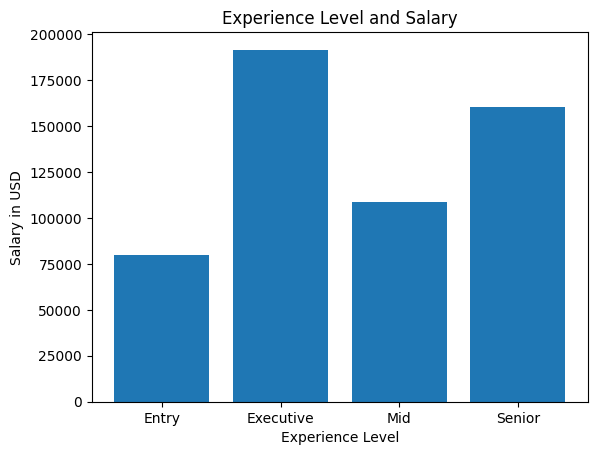

In [4]:
# Experience Level vs Salary in USD
print(df.groupby('Experience Level')['Salary in USD'].describe().astype(int))
experience_salary = df.groupby('Experience Level')['Salary in USD'].mean().reset_index()

import matplotlib.pyplot as plt
plt.bar(experience_salary['Experience Level'], experience_salary['Salary in USD'])
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Experience Level and Salary')
plt.show()

職稱Job Title
Data Engineer                      702
Data Scientist                     635
Data Analyst                       459
Machine Learning Engineer          300
Analytics Engineer                 132
                                  ... 
Deep Learning Researcher             1
Analytics Engineering Manager        1
AWS Data Architect                   1
BI Data Engineer                     1
Staff Machine Learning Engineer      1
Name: count, Length: 111, dtype: int64


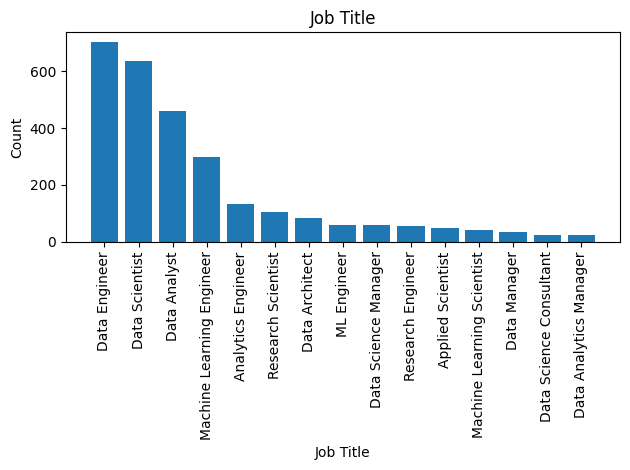

In [5]:
# 工作職稱數量前15名
print(f"職稱{df['Job Title'].value_counts()}")
plt.bar(df['Job Title'].value_counts().nlargest(15).index, df['Job Title'].value_counts().nlargest(15))
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Job Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [6]:
# 工作類型數量
print(f"工作類型\n{df['Employment Type'].value_counts()}")

# 專業技術等級
print('=' * 50)
print(f"專業技術\n{df['Expertise Level'].value_counts()}")

工作類型
Employment Type
Full-Time    3261
Contract       15
Part-Time      13
Freelance      11
Name: count, dtype: int64
專業技術
Expertise Level
Expert          2065
Intermediate     797
Junior           292
Director         146
Name: count, dtype: int64


# 資料前處理

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, shuffle = True, random_state = 123)

In [8]:
# Printing info on the training set
print(f'\n Train shape: {train.shape}\n')
print(f'\n {len(train)} Samples \n')
print(f'\n {len(train.columns)} Attributes \n')
display(train.head(10))
print('\n' * 2)

# Printing info on the training set
print(f'\n Test shape: {test.shape:}\n')
print(f'\n {len(test)} Samples \n')
print(f'\n {len(test.columns)} Attributes \n')
display(test.head(10))


 Train shape: (2640, 11)


 2640 Samples 


 11 Attributes 



,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
1515,Data Engineer,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Medium,2023
2066,Data Engineer,Full-Time,Senior,Expert,250000,United States Dollar,United States,250000,United States,Medium,2022
1785,Data Scientist,Full-Time,Senior,Expert,215050,United States Dollar,United States,215050,United States,Medium,2023
117,Data Engineer,Full-Time,Senior,Expert,240500,United States Dollar,United States,240500,United States,Large,2023
1473,Data Scientist,Full-Time,Senior,Expert,297300,United States Dollar,United States,297300,United States,Medium,2023
2413,Data Scientist,Full-Time,Senior,Expert,156600,United States Dollar,United States,156600,United States,Medium,2022
2728,Data Scientist,Full-Time,Mid,Intermediate,85000,Euro,Netherlands,89306,Netherlands,Medium,2022
3270,Business Data Analyst,Full-Time,Entry,Junior,50000,Euro,Luxembourg,59102,Luxembourg,Large,2021
1963,Data Engineer,Full-Time,Executive,Director,196200,United States Dollar,United States,196200,United States,Medium,2023
2135,Data Engineer,Full-Time,Executive,Director,239000,United States Dollar,United States,239000,United States,Medium,2022






 Test shape: (660, 11)


 660 Samples 


 11 Attributes 



,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
1482,MLOps Engineer,Full-Time,Mid,Intermediate,134000,United States Dollar,United States,134000,United States,Medium,2023
2738,Data Analyst,Full-Time,Senior,Expert,117000,United States Dollar,United States,117000,United States,Medium,2022
2743,Machine Learning Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2022
2424,Data Engineer,Full-Time,Senior,Expert,172200,United States Dollar,United States,172200,United States,Medium,2022
805,Machine Learning Engineer,Full-Time,Senior,Expert,180000,United States Dollar,United States,180000,United States,Medium,2023
2534,Big Data Engineer,Full-Time,Senior,Expert,210000,Canadian Dollar,Canada,161311,Canada,Medium,2022
1940,Data Scientist,Full-Time,Executive,Director,300000,United States Dollar,United States,300000,United States,Medium,2023
2876,Data Engineer,Full-Time,Mid,Intermediate,45000,Euro,Greece,47280,Greece,Medium,2022
1756,Data Analyst,Full-Time,Entry,Junior,48000,United States Dollar,United States,48000,United States,Medium,2023
649,Machine Learning Engineer,Full-Time,Senior,Expert,285000,United States Dollar,United States,285000,United States,Medium,2023


In [9]:
train_copy  = train.copy()
train_copy.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
1515,Data Engineer,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Medium,2023
2066,Data Engineer,Full-Time,Senior,Expert,250000,United States Dollar,United States,250000,United States,Medium,2022
1785,Data Scientist,Full-Time,Senior,Expert,215050,United States Dollar,United States,215050,United States,Medium,2023
117,Data Engineer,Full-Time,Senior,Expert,240500,United States Dollar,United States,240500,United States,Large,2023
1473,Data Scientist,Full-Time,Senior,Expert,297300,United States Dollar,United States,297300,United States,Medium,2023


In [10]:
# Defining orders for labels
value_orders = [
    ['Entry', 'Mid', 'Senior', 'Executive'],
    ['Junior', 'Intermediate', 'Expert', 'Director'],
    ['Small', 'Medium', 'Large']
]

from sklearn.preprocessing import OrdinalEncoder
# Using OrdinalEncoder to encode 'Experience Level', 'Expertise Level', and 'Company Size' attributes.
oe = OrdinalEncoder(categories = value_orders)
train_copy[['Experience Level', 'Expertise Level', 'Company Size']] = oe.fit_transform(train_copy[['Experience Level', 'Expertise Level', 'Company Size']])
train_copy.head(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
1515,Data Engineer,Full-Time,1.0,1.0,151000,United States Dollar,United States,151000,United States,1.0,2023
2066,Data Engineer,Full-Time,2.0,2.0,250000,United States Dollar,United States,250000,United States,1.0,2022
1785,Data Scientist,Full-Time,2.0,2.0,215050,United States Dollar,United States,215050,United States,1.0,2023
117,Data Engineer,Full-Time,2.0,2.0,240500,United States Dollar,United States,240500,United States,2.0,2023
1473,Data Scientist,Full-Time,2.0,2.0,297300,United States Dollar,United States,297300,United States,1.0,2023


In [11]:
# Selecting columns to be encoded
cols = ['Job Title', 'Employment Type', 'Salary Currency', 'Company Location', 'Employee Residence']

# Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_features = pd.DataFrame(ohe.fit_transform(train_copy[cols]), 
                                columns = ohe.get_feature_names_out(cols))
encoded_features.index = train_copy.index
train_copy = train_copy.drop(cols, axis = 1)
train_copy = pd.concat([train_copy, encoded_features], axis = 1)
train_copy

,Experience Level,Expertise Level,Salary,Salary in USD,Company Size,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,...,Employee Residence_Sweden,Employee Residence_Switzerland,Employee Residence_Thailand,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam
1515,1.0,1.0,151000,151000,1.0,2023,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2066,2.0,2.0,250000,250000,1.0,2022,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1785,2.0,2.0,215050,215050,1.0,2023,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117,2.0,2.0,240500,240500,2.0,2023,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1473,2.0,2.0,297300,297300,1.0,2023,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,1.0,1.0,122500,122500,1.0,2022,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3089,2.0,2.0,144000,144000,2.0,2021,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1766,1.0,1.0,126277,126277,1.0,2023,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1122,0.0,0.0,5500000,41809,2.0,2022,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X, y = train_copy.drop(['Salary in USD', 'Salary'], axis = 1), train_copy['Salary in USD']

In [13]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True, random_state = 123)
cv_splits = list(cv.split(X,y))

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
regressors = [
    ('CatBoost', CatBoostRegressor(random_state = 123, verbose = False)),
    ('XGboost', XGBRegressor(random_state = 123)),
    ('Ada Boost', AdaBoostRegressor(random_state = 123)),
    ('Histogram-based Gradient Boosting', HistGradientBoostingRegressor(random_state = 123))
]

In [16]:
y_range = y.max() - y.min()  
y_median = y.median()  
y_mean = y.mean() 

print(f"Range of y: {y_range}")
print(f"Median of y: {y_median}")
print(f"Mean of y: {y_mean:.2f}")

Range of y: 435000
Median of y: 136402.5
Mean of y: 142666.50


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
print('\nCross-Validation:')
for j, (name, clf) in enumerate(regressors):
    scores = []
    r2_scores = []
    
    print('\n')
    print(f'\n{name} Regressor:\n')
    
    for i, (train_index, val_index) in enumerate(cv_splits):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        r2 = r2_score(y_val, y_pred)
        
        n = X_val.shape[0]  
        p = X_val.shape[1]  
        
        adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 
        
        print(f'Fold {i + 1} RMSE = {rmse:.2f}')
        print(f'Fold {i + 1} Adjusted R-squared = {adjusted_r2:.2f}')
        
        scores.append(rmse)
        r2_scores.append(adjusted_r2)
        
        print('===================================================')
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        fold_std = np.std(scores)
        mean_adjusted_r2 = np.mean(r2_scores)  # Compute mean adjusted R-squared
        
        print(f'Mean RMSE = {mean_score:.2f} \u00B1 {fold_std:.3f}')
        print(f'Mean Adjusted R-squared = {mean_adjusted_r2:.2f}')


Cross-Validation:



CatBoost Regressor:

Fold 1 RMSE = 53063.09
Fold 1 Adjusted R-squared = -0.28
Fold 2 RMSE = 53708.96
Fold 2 Adjusted R-squared = -0.25
Fold 3 RMSE = 51754.75
Fold 3 Adjusted R-squared = -0.29
Fold 4 RMSE = 56227.11
Fold 4 Adjusted R-squared = -0.35
Fold 5 RMSE = 54002.19
Fold 5 Adjusted R-squared = -0.34
Mean RMSE = 53751.22 ± 1459.742
Mean Adjusted R-squared = -0.30



XGboost Regressor:

Fold 1 RMSE = 54526.44
Fold 1 Adjusted R-squared = -0.35
Fold 2 RMSE = 54602.49
Fold 2 Adjusted R-squared = -0.29
Fold 3 RMSE = 53875.71
Fold 3 Adjusted R-squared = -0.40
Fold 4 RMSE = 56727.33
Fold 4 Adjusted R-squared = -0.38
Fold 5 RMSE = 54985.04
Fold 5 Adjusted R-squared = -0.39
Mean RMSE = 54943.40 ± 960.643
Mean Adjusted R-squared = -0.36



Ada Boost Regressor:

Fold 1 RMSE = 60757.47
Fold 1 Adjusted R-squared = -0.67
Fold 2 RMSE = 64286.54
Fold 2 Adjusted R-squared = -0.79
Fold 3 RMSE = 61495.67
Fold 3 Adjusted R-squared = -0.82
Fold 4 RMSE = 67153.44
Fold 4 Adjusted R-

In [18]:
def objective(trial):
    params = {
        'loss': trial.suggest_categorical('loss', ['absolute_error', 'poisson', 'squared_error']),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 1.0, step = 0.2),
        'max_iter': trial.suggest_int('max_iter', 100, 1000, step = 50),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 30, 10000, step = 100),
        'max_depth': trial.suggest_int('max_depth', 30, 10000, step = 100),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 10, 1000, step = 15),
        'l2_regularization': trial.suggest_float('l2_regularization', 0.01, 100, step = 0.05)
    }
    
    clf = HistGradientBoostingRegressor(**params, random_state = 123)
    scores = []
    
    for i, (train_index, val_index) in enumerate(cv_splits):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        
        print(f'Fold {i + 1} RMSE = {rmse:.2f}')
        
        scores.append(rmse)
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        
    return -mean_score        
         
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 100, show_progress_bar = True)

c:\Users\s0954\anaconda3\envs\da\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-07-23 21:43:59,546] A new study created in memory with name: no-name-f39ba26d-7823-4cca-b230-59d0319e898f
  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The dis

Fold 1 RMSE = 61452.01
Fold 2 RMSE = 62798.90
Fold 3 RMSE = 59948.35
Fold 4 RMSE = 64663.78


Best trial: 0. Best value: -62148.1:   1%|          | 1/100 [00:13<22:35, 13.69s/it]

Fold 5 RMSE = 61877.57
[I 2023-07-23 21:44:13,237] Trial 0 finished with value: -62148.124722232016 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 750, 'max_leaf_nodes': 7430, 'max_depth': 3630, 'min_samples_leaf': 625, 'l2_regularization': 57.96}. Best is trial 0 with value: -62148.124722232016.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 68626.10
Fold 2 RMSE = 70174.55
Fold 3 RMSE = 67150.80
Fold 4 RMSE = 70787.50


Best trial: 0. Best value: -62148.1:   2%|▏         | 2/100 [00:17<13:14,  8.11s/it]

Fold 5 RMSE = 68038.38
[I 2023-07-23 21:44:17,442] Trial 1 finished with value: -68955.46825923855 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.30000000000000004, 'max_iter': 450, 'max_leaf_nodes': 6030, 'max_depth': 8430, 'min_samples_leaf': 970, 'l2_regularization': 75.96000000000001}. Best is trial 0 with value: -62148.124722232016.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54374.59
Fold 2 RMSE = 56741.40
Fold 3 RMSE = 53559.59
Fold 4 RMSE = 58234.59


Best trial: 2. Best value: -55887.6:   3%|▎         | 3/100 [00:51<31:38, 19.57s/it]

Fold 5 RMSE = 56527.73
[I 2023-07-23 21:44:50,659] Trial 2 finished with value: -55887.578938759805 and parameters: {'loss': 'poisson', 'learning_rate': 0.7000000000000001, 'max_iter': 400, 'max_leaf_nodes': 1030, 'max_depth': 5630, 'min_samples_leaf': 130, 'l2_regularization': 53.26}. Best is trial 2 with value: -55887.578938759805.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 58103.31
Fold 2 RMSE = 59127.90
Fold 3 RMSE = 56219.00
Fold 4 RMSE = 62503.91


Best trial: 2. Best value: -55887.6:   4%|▍         | 4/100 [01:08<29:37, 18.52s/it]

Fold 5 RMSE = 58613.52
[I 2023-07-23 21:45:07,560] Trial 3 finished with value: -58913.528030565125 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.5, 'max_iter': 800, 'max_leaf_nodes': 5530, 'max_depth': 8230, 'min_samples_leaf': 520, 'l2_regularization': 15.66}. Best is trial 2 with value: -55887.578938759805.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 61532.75
Fold 2 RMSE = 62920.94
Fold 3 RMSE = 60021.34
Fold 4 RMSE = 64717.56


Best trial: 2. Best value: -55887.6:   5%|▌         | 5/100 [01:27<29:41, 18.75s/it]

Fold 5 RMSE = 61940.48
[I 2023-07-23 21:45:26,716] Trial 4 finished with value: -62226.613663020056 and parameters: {'loss': 'poisson', 'learning_rate': 0.7000000000000001, 'max_iter': 1000, 'max_leaf_nodes': 830, 'max_depth': 7330, 'min_samples_leaf': 565, 'l2_regularization': 24.860000000000003}. Best is trial 2 with value: -55887.578938759805.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55089.67
Fold 2 RMSE = 57089.13
Fold 3 RMSE = 52603.62
Fold 4 RMSE = 58571.36


Best trial: 2. Best value: -55887.6:   6%|▌         | 6/100 [01:36<24:15, 15.49s/it]

Fold 5 RMSE = 56441.79
[I 2023-07-23 21:45:35,878] Trial 5 finished with value: -55959.11586764148 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 200, 'max_leaf_nodes': 9130, 'max_depth': 7730, 'min_samples_leaf': 265, 'l2_regularization': 64.51}. Best is trial 2 with value: -55887.578938759805.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 61452.01
Fold 2 RMSE = 62798.90
Fold 3 RMSE = 59948.35
Fold 4 RMSE = 64663.78


Best trial: 2. Best value: -55887.6:   7%|▋         | 7/100 [01:53<24:58, 16.12s/it]

Fold 5 RMSE = 61877.57
[I 2023-07-23 21:45:53,281] Trial 6 finished with value: -62148.12472188382 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 850, 'max_leaf_nodes': 3830, 'max_depth': 7530, 'min_samples_leaf': 610, 'l2_regularization': 49.410000000000004}. Best is trial 2 with value: -55887.578938759805.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 56201.89
Fold 2 RMSE = 57208.97
Fold 3 RMSE = 52960.06
Fold 4 RMSE = 59270.61


Best trial: 2. Best value: -55887.6:   8%|▊         | 8/100 [02:02<21:10, 13.81s/it]

Fold 5 RMSE = 56602.75
[I 2023-07-23 21:46:02,164] Trial 7 finished with value: -56448.85637663874 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.7000000000000001, 'max_iter': 200, 'max_leaf_nodes': 1130, 'max_depth': 9130, 'min_samples_leaf': 280, 'l2_regularization': 9.91}. Best is trial 2 with value: -55887.578938759805.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54541.32
Fold 2 RMSE = 56618.01
Fold 3 RMSE = 52511.17
Fold 4 RMSE = 58148.44


Best trial: 8. Best value: -55638.9:   9%|▉         | 9/100 [02:16<20:45, 13.68s/it]

Fold 5 RMSE = 56375.80
[I 2023-07-23 21:46:15,563] Trial 8 finished with value: -55638.94597489126 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 200, 'max_leaf_nodes': 9730, 'max_depth': 5530, 'min_samples_leaf': 175, 'l2_regularization': 56.410000000000004}. Best is trial 8 with value: -55638.94597489126.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 67105.60
Fold 2 RMSE = 68360.53
Fold 3 RMSE = 65705.15
Fold 4 RMSE = 69743.16


Best trial: 8. Best value: -55638.9:  10%|█         | 10/100 [02:18<15:18, 10.21s/it]

Fold 5 RMSE = 66341.70
[I 2023-07-23 21:46:17,986] Trial 9 finished with value: -67451.23143701983 and parameters: {'loss': 'poisson', 'learning_rate': 0.7000000000000001, 'max_iter': 250, 'max_leaf_nodes': 2830, 'max_depth': 9730, 'min_samples_leaf': 790, 'l2_regularization': 18.76}. Best is trial 8 with value: -55638.94597489126.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53952.21
Fold 2 RMSE = 55433.51
Fold 3 RMSE = 52085.67
Fold 4 RMSE = 58449.69


Best trial: 10. Best value: -55037.3:  11%|█         | 11/100 [02:37<19:20, 13.03s/it]

Fold 5 RMSE = 55265.56
[I 2023-07-23 21:46:37,433] Trial 10 finished with value: -55037.32722129846 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 100, 'max_leaf_nodes': 9130, 'max_depth': 1330, 'min_samples_leaf': 55, 'l2_regularization': 95.66000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 56107.35
Fold 2 RMSE = 56458.49
Fold 3 RMSE = 52665.54
Fold 4 RMSE = 58762.71


Best trial: 10. Best value: -55037.3:  12%|█▏        | 12/100 [03:57<49:02, 33.44s/it]

Fold 5 RMSE = 57325.90
[I 2023-07-23 21:47:57,532] Trial 11 finished with value: -56263.99834400909 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 100, 'max_leaf_nodes': 9730, 'max_depth': 530, 'min_samples_leaf': 10, 'l2_regularization': 90.76}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 56983.52
Fold 2 RMSE = 58409.26
Fold 3 RMSE = 54788.72
Fold 4 RMSE = 60826.12


Best trial: 10. Best value: -55037.3:  13%|█▎        | 13/100 [04:10<39:20, 27.13s/it]

Fold 5 RMSE = 57994.11
[I 2023-07-23 21:48:10,161] Trial 12 finished with value: -57800.34371504063 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 350, 'max_leaf_nodes': 8030, 'max_depth': 2730, 'min_samples_leaf': 310, 'l2_regularization': 98.36000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 58526.96
Fold 2 RMSE = 56052.59
Fold 3 RMSE = 53208.64
Fold 4 RMSE = 59286.32


Best trial: 10. Best value: -55037.3:  14%|█▍        | 14/100 [07:48<2:01:18, 84.63s/it]

Fold 5 RMSE = 57189.32
[I 2023-07-23 21:51:47,653] Trial 13 finished with value: -56852.76634084365 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 600, 'max_leaf_nodes': 7830, 'max_depth': 230, 'min_samples_leaf': 25, 'l2_regularization': 35.46}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54713.47
Fold 2 RMSE = 56739.93
Fold 3 RMSE = 52478.36
Fold 4 RMSE = 58065.88


Best trial: 10. Best value: -55037.3:  15%|█▌        | 15/100 [07:54<1:26:34, 61.12s/it]

Fold 5 RMSE = 56494.82
[I 2023-07-23 21:51:54,270] Trial 14 finished with value: -55698.49343632757 and parameters: {'loss': 'poisson', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9730, 'max_depth': 5330, 'min_samples_leaf': 175, 'l2_regularization': 80.31000000000002}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 57027.71
Fold 2 RMSE = 58741.36
Fold 3 RMSE = 55681.31
Fold 4 RMSE = 61272.63


Best trial: 10. Best value: -55037.3:  16%|█▌        | 16/100 [08:11<1:06:42, 47.65s/it]

Fold 5 RMSE = 58720.21
[I 2023-07-23 21:52:10,660] Trial 15 finished with value: -58288.643541160214 and parameters: {'loss': 'squared_error', 'learning_rate': 0.9, 'max_iter': 600, 'max_leaf_nodes': 6630, 'max_depth': 2430, 'min_samples_leaf': 415, 'l2_regularization': 72.71000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54190.37
Fold 2 RMSE = 56060.66
Fold 3 RMSE = 52328.89
Fold 4 RMSE = 58023.58


Best trial: 10. Best value: -55037.3:  17%|█▋        | 17/100 [08:38<57:20, 41.45s/it]  

Fold 5 RMSE = 56117.53
[I 2023-07-23 21:52:37,697] Trial 16 finished with value: -55344.20349911888 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 300, 'max_leaf_nodes': 8630, 'max_depth': 4230, 'min_samples_leaf': 130, 'l2_regularization': 0.76}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 57004.78
Fold 2 RMSE = 58651.06
Fold 3 RMSE = 55729.34
Fold 4 RMSE = 61495.50


Best trial: 10. Best value: -55037.3:  18%|█▊        | 18/100 [08:45<42:30, 31.10s/it]

Fold 5 RMSE = 58670.93
[I 2023-07-23 21:52:44,704] Trial 17 finished with value: -58310.32169139312 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 300, 'max_leaf_nodes': 4630, 'max_depth': 1530, 'min_samples_leaf': 400, 'l2_regularization': 3.01}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55622.80
Fold 2 RMSE = 56612.17
Fold 3 RMSE = 53143.20
Fold 4 RMSE = 58908.73


Best trial: 10. Best value: -55037.3:  19%|█▉        | 19/100 [09:40<51:45, 38.34s/it]

Fold 5 RMSE = 56083.04
[I 2023-07-23 21:53:39,891] Trial 18 finished with value: -56073.98724212791 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.1, 'max_iter': 500, 'max_leaf_nodes': 8430, 'max_depth': 4430, 'min_samples_leaf': 100, 'l2_regularization': 38.660000000000004}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 56919.06
Fold 2 RMSE = 58718.74
Fold 3 RMSE = 55640.12
Fold 4 RMSE = 61312.95


Best trial: 10. Best value: -55037.3:  20%|██        | 20/100 [09:43<36:50, 27.64s/it]

Fold 5 RMSE = 58592.32
[I 2023-07-23 21:53:42,592] Trial 19 finished with value: -58236.63858129592 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 6930, 'max_depth': 1230, 'min_samples_leaf': 430, 'l2_regularization': 32.36}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 67105.60
Fold 2 RMSE = 68360.53
Fold 3 RMSE = 65705.15
Fold 4 RMSE = 69743.16


Best trial: 10. Best value: -55037.3:  21%|██        | 21/100 [09:45<26:36, 20.20s/it]

Fold 5 RMSE = 66341.70
[I 2023-07-23 21:53:45,465] Trial 20 finished with value: -67451.23143516967 and parameters: {'loss': 'poisson', 'learning_rate': 0.5, 'max_iter': 300, 'max_leaf_nodes': 8730, 'max_depth': 6430, 'min_samples_leaf': 715, 'l2_regularization': 1.06}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55072.66
Fold 2 RMSE = 57109.45
Fold 3 RMSE = 52522.62
Fold 4 RMSE = 58487.37


Best trial: 10. Best value: -55037.3:  22%|██▏       | 22/100 [09:53<21:23, 16.46s/it]

Fold 5 RMSE = 56646.86
[I 2023-07-23 21:53:53,195] Trial 21 finished with value: -55967.790889941345 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 150, 'max_leaf_nodes': 9530, 'max_depth': 4130, 'min_samples_leaf': 220, 'l2_regularization': 86.61000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53740.22
Fold 2 RMSE = 55955.05
Fold 3 RMSE = 52616.50
Fold 4 RMSE = 58394.91


Best trial: 10. Best value: -55037.3:  23%|██▎       | 23/100 [10:28<28:02, 21.86s/it]

Fold 5 RMSE = 55605.96
[I 2023-07-23 21:54:27,634] Trial 22 finished with value: -55262.528934116606 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 250, 'max_leaf_nodes': 9930, 'max_depth': 3130, 'min_samples_leaf': 85, 'l2_regularization': 65.96000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55265.64
Fold 2 RMSE = 56034.65
Fold 3 RMSE = 52554.77
Fold 4 RMSE = 58924.41


Best trial: 10. Best value: -55037.3:  24%|██▍       | 24/100 [11:32<43:50, 34.61s/it]

Fold 5 RMSE = 55864.67
[I 2023-07-23 21:55:32,013] Trial 23 finished with value: -55728.827415842505 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 400, 'max_leaf_nodes': 8630, 'max_depth': 3130, 'min_samples_leaf': 70, 'l2_regularization': 66.21000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54356.73
Fold 2 RMSE = 56109.45
Fold 3 RMSE = 52909.09
Fold 4 RMSE = 58001.36


Best trial: 10. Best value: -55037.3:  25%|██▌       | 25/100 [12:06<42:54, 34.33s/it]c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 5 RMSE = 56001.97
[I 2023-07-23 21:56:05,670] Trial 24 finished with value: -55475.71893302947 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 300, 'max_leaf_nodes': 7230, 'max_depth': 2330, 'min_samples_leaf': 100, 'l2_regularization': 46.21}. Best is trial 10 with value: -55037.32722129846.
Fold 1 RMSE = 57024.10
Fold 2 RMSE = 58666.63
Fold 3 RMSE = 55764.28
Fold 4 RMSE = 61446.55


Best trial: 10. Best value: -55037.3:  26%|██▌       | 26/100 [12:13<32:31, 26.38s/it]

Fold 5 RMSE = 57836.57
[I 2023-07-23 21:56:13,497] Trial 25 finished with value: -58147.62441461813 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 250, 'max_leaf_nodes': 8830, 'max_depth': 1630, 'min_samples_leaf': 340, 'l2_regularization': 97.46000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55271.50
Fold 2 RMSE = 56979.91
Fold 3 RMSE = 52431.04
Fold 4 RMSE = 58498.77


Best trial: 10. Best value: -55037.3:  27%|██▋       | 27/100 [12:44<33:26, 27.49s/it]

Fold 5 RMSE = 56575.66
[I 2023-07-23 21:56:43,580] Trial 26 finished with value: -55951.37621572489 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 550, 'max_leaf_nodes': 6430, 'max_depth': 3530, 'min_samples_leaf': 205, 'l2_regularization': 67.41000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54826.76
Fold 2 RMSE = 55993.18
Fold 3 RMSE = 52734.56
Fold 4 RMSE = 59251.85


Best trial: 10. Best value: -55037.3:  28%|██▊       | 28/100 [13:22<36:49, 30.69s/it]

Fold 5 RMSE = 56071.17
[I 2023-07-23 21:57:21,744] Trial 27 finished with value: -55775.50637047701 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 150, 'max_leaf_nodes': 8130, 'max_depth': 2030, 'min_samples_leaf': 40, 'l2_regularization': 87.01}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54134.73
Fold 2 RMSE = 56167.05
Fold 3 RMSE = 52402.46
Fold 4 RMSE = 57848.25


Best trial: 10. Best value: -55037.3:  29%|██▉       | 29/100 [13:52<36:11, 30.59s/it]

Fold 5 RMSE = 55970.17
[I 2023-07-23 21:57:52,087] Trial 28 finished with value: -55304.534751899875 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 400, 'max_leaf_nodes': 2530, 'max_depth': 4430, 'min_samples_leaf': 145, 'l2_regularization': 41.06}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53866.39
Fold 2 RMSE = 55501.63
Fold 3 RMSE = 52791.97
Fold 4 RMSE = 58448.23


Best trial: 10. Best value: -55037.3:  30%|███       | 30/100 [21:35<3:06:59, 160.28s/it]

Fold 5 RMSE = 55749.12
[I 2023-07-23 22:05:34,961] Trial 29 finished with value: -55271.46800648353 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 700, 'max_leaf_nodes': 1930, 'max_depth': 830, 'min_samples_leaf': 10, 'l2_regularization': 43.46}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55637.66
Fold 2 RMSE = 55938.41
Fold 3 RMSE = 53231.37
Fold 4 RMSE = 58974.01


Best trial: 10. Best value: -55037.3:  31%|███       | 31/100 [25:02<3:20:20, 174.20s/it]

Fold 5 RMSE = 56407.47
[I 2023-07-23 22:09:01,665] Trial 30 finished with value: -56037.78551295252 and parameters: {'loss': 'squared_error', 'learning_rate': 0.30000000000000004, 'max_iter': 700, 'max_leaf_nodes': 30, 'max_depth': 830, 'min_samples_leaf': 10, 'l2_regularization': 62.26}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54281.34
Fold 2 RMSE = 56257.55
Fold 3 RMSE = 52477.32
Fold 4 RMSE = 57912.21


Best trial: 10. Best value: -55037.3:  32%|███▏      | 32/100 [25:55<2:36:14, 137.86s/it]

Fold 5 RMSE = 55995.91
[I 2023-07-23 22:09:54,719] Trial 31 finished with value: -55384.862726072475 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 700, 'max_leaf_nodes': 2530, 'max_depth': 3230, 'min_samples_leaf': 145, 'l2_regularization': 45.96}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53702.50
Fold 2 RMSE = 55965.80
Fold 3 RMSE = 52564.41
Fold 4 RMSE = 58538.40


Best trial: 10. Best value: -55037.3:  33%|███▎      | 33/100 [26:52<2:06:57, 113.69s/it]

Fold 5 RMSE = 55798.76
[I 2023-07-23 22:10:52,019] Trial 32 finished with value: -55313.97536506419 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 450, 'max_leaf_nodes': 1930, 'max_depth': 130, 'min_samples_leaf': 85, 'l2_regularization': 39.21}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 68439.15
Fold 2 RMSE = 70056.55
Fold 3 RMSE = 66495.28
Fold 4 RMSE = 70455.54


Best trial: 10. Best value: -55037.3:  34%|███▍      | 34/100 [27:00<1:30:03, 81.87s/it] 

Fold 5 RMSE = 67937.53
[I 2023-07-23 22:10:59,634] Trial 33 finished with value: -68676.80960870215 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 850, 'max_leaf_nodes': 3330, 'max_depth': 1130, 'min_samples_leaf': 985, 'l2_regularization': 29.210000000000004}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55145.55
Fold 2 RMSE = 57119.95
Fold 3 RMSE = 52643.76
Fold 4 RMSE = 58430.70


Best trial: 10. Best value: -55037.3:  35%|███▌      | 35/100 [27:19<1:08:26, 63.17s/it]

Fold 5 RMSE = 56720.58
[I 2023-07-23 22:11:19,176] Trial 34 finished with value: -56012.10701457531 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 400, 'max_leaf_nodes': 4130, 'max_depth': 4630, 'min_samples_leaf': 235, 'l2_regularization': 41.01}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54893.07
Fold 2 RMSE = 56136.38
Fold 3 RMSE = 52536.73
Fold 4 RMSE = 58857.60


Best trial: 10. Best value: -55037.3:  36%|███▌      | 36/100 [28:55<1:17:57, 73.09s/it]

Fold 5 RMSE = 56022.73
[I 2023-07-23 22:12:55,414] Trial 35 finished with value: -55689.30353017194 and parameters: {'loss': 'squared_error', 'learning_rate': 0.30000000000000004, 'max_iter': 650, 'max_leaf_nodes': 5430, 'max_depth': 6630, 'min_samples_leaf': 70, 'l2_regularization': 56.71}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55263.20
Fold 2 RMSE = 56475.78
Fold 3 RMSE = 52882.59
Fold 4 RMSE = 58776.16


Best trial: 10. Best value: -55037.3:  37%|███▋      | 37/100 [29:31<1:04:52, 61.78s/it]

Fold 5 RMSE = 56029.55
[I 2023-07-23 22:13:30,801] Trial 36 finished with value: -55885.45519091276 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.1, 'max_iter': 450, 'max_leaf_nodes': 1830, 'max_depth': 1730, 'min_samples_leaf': 145, 'l2_regularization': 79.86000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 68439.15
Fold 2 RMSE = 70056.55
Fold 3 RMSE = 66495.28
Fold 4 RMSE = 70455.54


Best trial: 10. Best value: -55037.3:  38%|███▊      | 38/100 [29:38<46:47, 45.28s/it]  

Fold 5 RMSE = 67937.53
[I 2023-07-23 22:13:37,590] Trial 37 finished with value: -68676.80960870215 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 750, 'max_leaf_nodes': 130, 'max_depth': 3830, 'min_samples_leaf': 895, 'l2_regularization': 26.360000000000003}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 56994.61
Fold 2 RMSE = 58365.06
Fold 3 RMSE = 54875.95
Fold 4 RMSE = 60762.20


Best trial: 10. Best value: -55037.3:  39%|███▉      | 39/100 [30:12<42:39, 41.96s/it]

Fold 5 RMSE = 57882.42
[I 2023-07-23 22:14:11,803] Trial 38 finished with value: -57776.04754225291 and parameters: {'loss': 'squared_error', 'learning_rate': 0.30000000000000004, 'max_iter': 1000, 'max_leaf_nodes': 1630, 'max_depth': 2830, 'min_samples_leaf': 325, 'l2_regularization': 48.86}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 58046.19
Fold 2 RMSE = 58985.62
Fold 3 RMSE = 56259.91
Fold 4 RMSE = 62382.07


Best trial: 10. Best value: -55037.3:  40%|████      | 40/100 [30:35<36:16, 36.27s/it]

Fold 5 RMSE = 58580.86
[I 2023-07-23 22:14:34,805] Trial 39 finished with value: -58850.93068755026 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.9, 'max_iter': 900, 'max_leaf_nodes': 2430, 'max_depth': 6030, 'min_samples_leaf': 475, 'l2_regularization': 72.76}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55129.84
Fold 2 RMSE = 57117.31
Fold 3 RMSE = 52605.42
Fold 4 RMSE = 58437.44


Best trial: 10. Best value: -55037.3:  41%|████      | 41/100 [30:59<32:01, 32.56s/it]

Fold 5 RMSE = 56646.63
[I 2023-07-23 22:14:58,707] Trial 40 finished with value: -55987.328073893405 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 500, 'max_leaf_nodes': 3130, 'max_depth': 5030, 'min_samples_leaf': 250, 'l2_regularization': 21.360000000000003}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54264.65
Fold 2 RMSE = 55854.62
Fold 3 RMSE = 52525.05
Fold 4 RMSE = 58445.21


Best trial: 10. Best value: -55037.3:  42%|████▏     | 42/100 [32:06<41:27, 42.89s/it]

Fold 5 RMSE = 55510.41
[I 2023-07-23 22:16:05,709] Trial 41 finished with value: -55319.98489290563 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 450, 'max_leaf_nodes': 1930, 'max_depth': 30, 'min_samples_leaf': 70, 'l2_regularization': 40.61}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54344.98
Fold 2 RMSE = 56282.43
Fold 3 RMSE = 52811.36
Fold 4 RMSE = 57844.09


Best trial: 10. Best value: -55037.3:  43%|████▎     | 43/100 [32:42<38:54, 40.96s/it]

Fold 5 RMSE = 56193.27
[I 2023-07-23 22:16:42,148] Trial 42 finished with value: -55495.22441578987 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 350, 'max_leaf_nodes': 830, 'max_depth': 630, 'min_samples_leaf': 100, 'l2_regularization': 53.11}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54562.16
Fold 2 RMSE = 56582.75
Fold 3 RMSE = 52498.81
Fold 4 RMSE = 58045.67


Best trial: 10. Best value: -55037.3:  44%|████▍     | 44/100 [33:13<35:32, 38.08s/it]

Fold 5 RMSE = 56453.49
[I 2023-07-23 22:17:13,515] Trial 43 finished with value: -55628.57620145534 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 500, 'max_leaf_nodes': 4030, 'max_depth': 1030, 'min_samples_leaf': 175, 'l2_regularization': 44.910000000000004}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54085.60
Fold 2 RMSE = 55680.37
Fold 3 RMSE = 52906.40
Fold 4 RMSE = 58406.76


Best trial: 10. Best value: -55037.3:  45%|████▌     | 45/100 [35:26<1:01:00, 66.56s/it]

Fold 5 RMSE = 55737.24
[I 2023-07-23 22:19:26,513] Trial 44 finished with value: -55363.275871721 and parameters: {'loss': 'squared_error', 'learning_rate': 0.30000000000000004, 'max_iter': 200, 'max_leaf_nodes': 1430, 'max_depth': 30, 'min_samples_leaf': 10, 'l2_regularization': 33.76}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54120.61
Fold 2 RMSE = 55908.16
Fold 3 RMSE = 52379.18
Fold 4 RMSE = 58371.94


Best trial: 10. Best value: -55037.3:  46%|████▌     | 46/100 [36:17<55:41, 61.88s/it]  

Fold 5 RMSE = 55408.60
[I 2023-07-23 22:20:17,489] Trial 45 finished with value: -55237.69560083138 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 350, 'max_leaf_nodes': 3530, 'max_depth': 530, 'min_samples_leaf': 70, 'l2_regularization': 52.06}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54866.88
Fold 2 RMSE = 55614.61
Fold 3 RMSE = 52987.56
Fold 4 RMSE = 59196.64


Best trial: 10. Best value: -55037.3:  47%|████▋     | 47/100 [37:01<49:53, 56.49s/it]

Fold 5 RMSE = 55810.37
[I 2023-07-23 22:21:01,387] Trial 46 finished with value: -55695.21352263047 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.30000000000000004, 'max_iter': 250, 'max_leaf_nodes': 3630, 'max_depth': 2030, 'min_samples_leaf': 55, 'l2_regularization': 61.56}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54507.45
Fold 2 RMSE = 56589.24
Fold 3 RMSE = 52525.91
Fold 4 RMSE = 58069.43


Best trial: 10. Best value: -55037.3:  48%|████▊     | 48/100 [37:23<40:01, 46.18s/it]

Fold 5 RMSE = 56465.13
[I 2023-07-23 22:21:23,526] Trial 47 finished with value: -55631.42988463802 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 350, 'max_leaf_nodes': 4730, 'max_depth': 530, 'min_samples_leaf': 175, 'l2_regularization': 51.21}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54167.35
Fold 2 RMSE = 56351.05
Fold 3 RMSE = 52540.24
Fold 4 RMSE = 57845.03


Best trial: 10. Best value: -55037.3:  49%|████▉     | 49/100 [37:36<30:45, 36.18s/it]

Fold 5 RMSE = 56143.12
[I 2023-07-23 22:21:36,372] Trial 48 finished with value: -55409.35593838997 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 9330, 'max_depth': 2630, 'min_samples_leaf': 130, 'l2_regularization': 71.56}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 61452.01
Fold 2 RMSE = 62798.90
Fold 3 RMSE = 59948.35
Fold 4 RMSE = 64663.78


Best trial: 10. Best value: -55037.3:  50%|█████     | 50/100 [37:45<23:09, 27.79s/it]

Fold 5 RMSE = 61877.57
[I 2023-07-23 22:21:44,587] Trial 49 finished with value: -62148.12472071021 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 400, 'max_leaf_nodes': 2430, 'max_depth': 3630, 'min_samples_leaf': 565, 'l2_regularization': 58.56}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55209.83
Fold 2 RMSE = 57028.38
Fold 3 RMSE = 52554.87
Fold 4 RMSE = 58456.95


Best trial: 10. Best value: -55037.3:  51%|█████     | 51/100 [37:53<17:54, 21.92s/it]

Fold 5 RMSE = 56468.44
[I 2023-07-23 22:21:52,815] Trial 50 finished with value: -55943.69408783658 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 200, 'max_leaf_nodes': 3130, 'max_depth': 2230, 'min_samples_leaf': 280, 'l2_regularization': 94.61000000000001}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54336.28
Fold 2 RMSE = 56381.27
Fold 3 RMSE = 53057.56
Fold 4 RMSE = 58041.78


Best trial: 10. Best value: -55037.3:  52%|█████▏    | 52/100 [38:51<26:20, 32.93s/it]

Fold 5 RMSE = 56199.94
[I 2023-07-23 22:22:51,414] Trial 51 finished with value: -55603.36521629143 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 550, 'max_leaf_nodes': 1130, 'max_depth': 430, 'min_samples_leaf': 100, 'l2_regularization': 36.86}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53717.07
Fold 2 RMSE = 55827.38
Fold 3 RMSE = 52904.62
Fold 4 RMSE = 58341.76


Best trial: 10. Best value: -55037.3:  53%|█████▎    | 53/100 [40:11<36:50, 47.03s/it]

Fold 5 RMSE = 55496.38
[I 2023-07-23 22:24:11,349] Trial 52 finished with value: -55257.4400142675 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 350, 'max_leaf_nodes': 2130, 'max_depth': 1330, 'min_samples_leaf': 40, 'l2_regularization': 42.910000000000004}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53780.58
Fold 2 RMSE = 55672.89
Fold 3 RMSE = 52803.11
Fold 4 RMSE = 58220.34


Best trial: 10. Best value: -55037.3:  54%|█████▍    | 54/100 [41:31<43:28, 56.70s/it]

Fold 5 RMSE = 55652.61
[I 2023-07-23 22:25:30,619] Trial 53 finished with value: -55225.906865283774 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 350, 'max_leaf_nodes': 2230, 'max_depth': 1530, 'min_samples_leaf': 40, 'l2_regularization': 42.31}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53698.66
Fold 2 RMSE = 55751.74
Fold 3 RMSE = 52709.47
Fold 4 RMSE = 58209.64


Best trial: 10. Best value: -55037.3:  55%|█████▌    | 55/100 [42:28<42:46, 57.04s/it]

Fold 5 RMSE = 55452.67
[I 2023-07-23 22:26:28,461] Trial 54 finished with value: -55164.436938303836 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 250, 'max_leaf_nodes': 9930, 'max_depth': 1330, 'min_samples_leaf': 40, 'l2_regularization': 29.76}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54033.43
Fold 2 RMSE = 55798.58
Fold 3 RMSE = 52626.78
Fold 4 RMSE = 58801.51


Best trial: 10. Best value: -55037.3:  56%|█████▌    | 56/100 [43:31<43:06, 58.78s/it]

Fold 5 RMSE = 55640.18
[I 2023-07-23 22:27:31,296] Trial 55 finished with value: -55380.09693552934 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 250, 'max_leaf_nodes': 9330, 'max_depth': 1330, 'min_samples_leaf': 40, 'l2_regularization': 13.06}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 55129.76
Fold 2 RMSE = 56958.09
Fold 3 RMSE = 52664.05
Fold 4 RMSE = 58262.55


Best trial: 10. Best value: -55037.3:  57%|█████▋    | 57/100 [43:40<31:24, 43.83s/it]

Fold 5 RMSE = 56560.89
[I 2023-07-23 22:27:40,256] Trial 56 finished with value: -55915.067759784506 and parameters: {'loss': 'squared_error', 'learning_rate': 0.30000000000000004, 'max_iter': 150, 'max_leaf_nodes': 9930, 'max_depth': 1630, 'min_samples_leaf': 190, 'l2_regularization': 30.51}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54369.43
Fold 2 RMSE = 55974.62
Fold 3 RMSE = 53163.34
Fold 4 RMSE = 59150.28


Best trial: 10. Best value: -55037.3:  58%|█████▊    | 58/100 [45:03<38:54, 55.58s/it]

Fold 5 RMSE = 56093.14
[I 2023-07-23 22:29:03,230] Trial 57 finished with value: -55750.16397512356 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.7000000000000001, 'max_iter': 350, 'max_leaf_nodes': 7630, 'max_depth': 1830, 'min_samples_leaf': 40, 'l2_regularization': 20.660000000000004}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54207.44
Fold 2 RMSE = 56230.19
Fold 3 RMSE = 52501.37
Fold 4 RMSE = 58102.93


Best trial: 10. Best value: -55037.3:  59%|█████▉    | 59/100 [45:32<32:32, 47.62s/it]

Fold 5 RMSE = 55914.00
[I 2023-07-23 22:29:32,297] Trial 58 finished with value: -55391.18579797681 and parameters: {'loss': 'poisson', 'learning_rate': 0.1, 'max_iter': 300, 'max_leaf_nodes': 9130, 'max_depth': 1330, 'min_samples_leaf': 115, 'l2_regularization': 25.110000000000003}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 67105.60
Fold 2 RMSE = 68360.53
Fold 3 RMSE = 60021.34
Fold 4 RMSE = 69743.16


Best trial: 10. Best value: -55037.3:  60%|██████    | 60/100 [45:35<22:41, 34.05s/it]

Fold 5 RMSE = 66341.70
[I 2023-07-23 22:29:34,672] Trial 59 finished with value: -66314.46795622911 and parameters: {'loss': 'poisson', 'learning_rate': 0.30000000000000004, 'max_iter': 200, 'max_leaf_nodes': 5830, 'max_depth': 3030, 'min_samples_leaf': 700, 'l2_regularization': 48.31}. Best is trial 10 with value: -55037.32722129846.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53900.46
Fold 2 RMSE = 55495.07
Fold 3 RMSE = 52221.25
Fold 4 RMSE = 58164.76


Best trial: 60. Best value: -55032:  61%|██████    | 61/100 [46:17<23:50, 36.68s/it]  

Fold 5 RMSE = 55378.53
[I 2023-07-23 22:30:17,476] Trial 60 finished with value: -55032.014742813466 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 250, 'max_leaf_nodes': 9830, 'max_depth': 930, 'min_samples_leaf': 55, 'l2_regularization': 53.160000000000004}. Best is trial 60 with value: -55032.014742813466.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53855.23
Fold 2 RMSE = 55469.26
Fold 3 RMSE = 52313.53
Fold 4 RMSE = 58164.69


Best trial: 60. Best value: -55032:  62%|██████▏   | 62/100 [47:00<24:25, 38.57s/it]

Fold 5 RMSE = 55363.03
[I 2023-07-23 22:31:00,461] Trial 61 finished with value: -55033.145669897494 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 250, 'max_leaf_nodes': 9930, 'max_depth': 930, 'min_samples_leaf': 55, 'l2_regularization': 54.46}. Best is trial 60 with value: -55032.014742813466.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53825.25
Fold 2 RMSE = 55335.48
Fold 3 RMSE = 51813.81
Fold 4 RMSE = 58223.07


Best trial: 62. Best value: -54910.5:  63%|██████▎   | 63/100 [47:17<19:46, 32.06s/it]

Fold 5 RMSE = 55354.84
[I 2023-07-23 22:31:17,346] Trial 62 finished with value: -54910.491044829505 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 100, 'max_leaf_nodes': 9030, 'max_depth': 830, 'min_samples_leaf': 55, 'l2_regularization': 53.96}. Best is trial 62 with value: -54910.491044829505.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 52584.36
Fold 2 RMSE = 54793.00
Fold 3 RMSE = 51810.32
Fold 4 RMSE = 56948.07


Best trial: 63. Best value: -54038.8:  64%|██████▍   | 64/100 [48:11<23:06, 38.52s/it]

Fold 5 RMSE = 54058.30
[I 2023-07-23 22:32:10,918] Trial 63 finished with value: -54038.81073884996 and parameters: {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 100, 'max_leaf_nodes': 9630, 'max_depth': 830, 'min_samples_leaf': 10, 'l2_regularization': 56.46}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53021.36
Fold 2 RMSE = 55277.15
Fold 3 RMSE = 52303.53
Fold 4 RMSE = 57822.01


Best trial: 63. Best value: -54038.8:  65%|██████▌   | 65/100 [49:12<26:28, 45.38s/it]

Fold 5 RMSE = 55048.45
[I 2023-07-23 22:33:12,314] Trial 64 finished with value: -54694.498927956214 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 8930, 'max_depth': 930, 'min_samples_leaf': 10, 'l2_regularization': 59.36}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53666.54
Fold 2 RMSE = 55168.33
Fold 3 RMSE = 53001.36
Fold 4 RMSE = 58220.63


Best trial: 63. Best value: -54038.8:  66%|██████▌   | 66/100 [50:14<28:30, 50.30s/it]

Fold 5 RMSE = 55502.80
[I 2023-07-23 22:34:14,110] Trial 65 finished with value: -55111.93404261766 and parameters: {'loss': 'squared_error', 'learning_rate': 0.7000000000000001, 'max_iter': 100, 'max_leaf_nodes': 8230, 'max_depth': 930, 'min_samples_leaf': 10, 'l2_regularization': 58.96}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54282.11
Fold 2 RMSE = 56287.75
Fold 3 RMSE = 52577.91
Fold 4 RMSE = 58028.09


Best trial: 63. Best value: -54038.8:  67%|██████▋   | 67/100 [50:22<20:38, 37.54s/it]

Fold 5 RMSE = 56070.33
[I 2023-07-23 22:34:21,861] Trial 66 finished with value: -55449.23790911191 and parameters: {'loss': 'squared_error', 'learning_rate': 0.7000000000000001, 'max_iter': 100, 'max_leaf_nodes': 8230, 'max_depth': 1030, 'min_samples_leaf': 145, 'l2_regularization': 59.56}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53344.83
Fold 2 RMSE = 55392.85
Fold 3 RMSE = 52441.69
Fold 4 RMSE = 57901.28


Best trial: 63. Best value: -54038.8:  68%|██████▊   | 68/100 [51:24<23:57, 44.91s/it]

Fold 5 RMSE = 55089.29
[I 2023-07-23 22:35:23,969] Trial 67 finished with value: -54833.986343063356 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 8930, 'max_depth': 830, 'min_samples_leaf': 10, 'l2_regularization': 55.86}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54213.50
Fold 2 RMSE = 56434.30
Fold 3 RMSE = 52793.47
Fold 4 RMSE = 58078.71


Best trial: 63. Best value: -54038.8:  69%|██████▉   | 69/100 [51:38<18:23, 35.61s/it]

Fold 5 RMSE = 56172.12
[I 2023-07-23 22:35:37,885] Trial 68 finished with value: -55538.42178675522 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 8830, 'max_depth': 330, 'min_samples_leaf': 115, 'l2_regularization': 55.51}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53238.37
Fold 2 RMSE = 55598.61
Fold 3 RMSE = 52301.79
Fold 4 RMSE = 57964.78


Best trial: 63. Best value: -54038.8:  70%|███████   | 70/100 [52:40<21:44, 43.47s/it]

Fold 5 RMSE = 55355.56
[I 2023-07-23 22:36:39,702] Trial 69 finished with value: -54891.82206538769 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9130, 'max_depth': 8230, 'min_samples_leaf': 10, 'l2_regularization': 54.86}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53195.99
Fold 2 RMSE = 55288.85
Fold 3 RMSE = 52502.94
Fold 4 RMSE = 57952.96


Best trial: 63. Best value: -54038.8:  71%|███████   | 71/100 [53:41<23:32, 48.72s/it]

Fold 5 RMSE = 55052.14
[I 2023-07-23 22:37:40,653] Trial 70 finished with value: -54798.57816139875 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9530, 'max_depth': 8330, 'min_samples_leaf': 10, 'l2_regularization': 63.36}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53082.34
Fold 2 RMSE = 55159.80
Fold 3 RMSE = 52389.23
Fold 4 RMSE = 57847.77


Best trial: 63. Best value: -54038.8:  72%|███████▏  | 72/100 [54:41<24:24, 52.30s/it]

Fold 5 RMSE = 55219.92
[I 2023-07-23 22:38:41,314] Trial 71 finished with value: -54739.809603377085 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9530, 'max_depth': 8330, 'min_samples_leaf': 10, 'l2_regularization': 63.160000000000004}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53045.76
Fold 2 RMSE = 55064.57
Fold 3 RMSE = 52299.24
Fold 4 RMSE = 57895.58


Best trial: 63. Best value: -54038.8:  73%|███████▎  | 73/100 [55:42<24:38, 54.74s/it]

Fold 5 RMSE = 54819.29
[I 2023-07-23 22:39:41,753] Trial 72 finished with value: -54624.88981623111 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9530, 'max_depth': 8530, 'min_samples_leaf': 10, 'l2_regularization': 69.26}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 52819.66
Fold 2 RMSE = 55111.05
Fold 3 RMSE = 52191.11
Fold 4 RMSE = 57804.62


Best trial: 63. Best value: -54038.8:  74%|███████▍  | 74/100 [56:42<24:25, 56.36s/it]

Fold 5 RMSE = 54989.79
[I 2023-07-23 22:40:41,904] Trial 73 finished with value: -54583.24498362346 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9430, 'max_depth': 8330, 'min_samples_leaf': 10, 'l2_regularization': 70.06}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53303.36
Fold 2 RMSE = 55286.11
Fold 3 RMSE = 52571.30
Fold 4 RMSE = 58270.76


Best trial: 63. Best value: -54038.8:  75%|███████▌  | 75/100 [58:14<27:54, 66.99s/it]

Fold 5 RMSE = 55327.93
[I 2023-07-23 22:42:13,703] Trial 74 finished with value: -54951.89121134655 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 9530, 'max_depth': 8630, 'min_samples_leaf': 10, 'l2_regularization': 68.56}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53132.55
Fold 2 RMSE = 55272.06
Fold 3 RMSE = 52461.90
Fold 4 RMSE = 57815.52


Best trial: 63. Best value: -54038.8:  76%|███████▌  | 76/100 [59:14<26:02, 65.09s/it]

Fold 5 RMSE = 55074.69
[I 2023-07-23 22:43:14,356] Trial 75 finished with value: -54751.34500669998 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 8530, 'max_depth': 7930, 'min_samples_leaf': 10, 'l2_regularization': 63.61}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53746.71
Fold 2 RMSE = 56016.45
Fold 3 RMSE = 52716.27
Fold 4 RMSE = 58486.46


Best trial: 63. Best value: -54038.8:  77%|███████▋  | 77/100 [59:27<18:55, 49.36s/it]

Fold 5 RMSE = 55736.34
[I 2023-07-23 22:43:27,017] Trial 76 finished with value: -55340.44646729586 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 8530, 'max_depth': 9330, 'min_samples_leaf': 85, 'l2_regularization': 63.86}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53520.56
Fold 2 RMSE = 55215.25
Fold 3 RMSE = 52324.34
Fold 4 RMSE = 58119.23


Best trial: 63. Best value: -54038.8:  78%|███████▊  | 78/100 [1:00:58<22:43, 61.98s/it]

Fold 5 RMSE = 55364.17
[I 2023-07-23 22:44:58,426] Trial 77 finished with value: -54908.7090990111 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 9430, 'max_depth': 7730, 'min_samples_leaf': 10, 'l2_regularization': 70.31}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53773.51
Fold 2 RMSE = 56231.14
Fold 3 RMSE = 52913.34
Fold 4 RMSE = 58709.93


Best trial: 63. Best value: -54038.8:  79%|███████▉  | 79/100 [1:01:23<17:48, 50.89s/it]

Fold 5 RMSE = 55745.93
[I 2023-07-23 22:45:23,448] Trial 78 finished with value: -55474.77013595984 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 200, 'max_leaf_nodes': 7930, 'max_depth': 7030, 'min_samples_leaf': 85, 'l2_regularization': 78.66000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 68439.15
Fold 2 RMSE = 70056.55
Fold 3 RMSE = 66495.28
Fold 4 RMSE = 70455.54


Best trial: 63. Best value: -54038.8:  80%|████████  | 80/100 [1:01:25<11:59, 35.99s/it]

Fold 5 RMSE = 67937.53
[I 2023-07-23 22:45:24,666] Trial 79 finished with value: -68676.80960870215 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 8430, 'max_depth': 8730, 'min_samples_leaf': 880, 'l2_regularization': 75.66000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54292.46
Fold 2 RMSE = 56409.65
Fold 3 RMSE = 52830.08
Fold 4 RMSE = 58058.57


Best trial: 63. Best value: -54038.8:  81%|████████  | 81/100 [1:01:38<09:17, 29.35s/it]

Fold 5 RMSE = 56143.90
[I 2023-07-23 22:45:38,520] Trial 80 finished with value: -55546.9340089008 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 7230, 'max_depth': 7730, 'min_samples_leaf': 115, 'l2_regularization': 64.61000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 52947.57
Fold 2 RMSE = 55062.54
Fold 3 RMSE = 52516.44
Fold 4 RMSE = 57585.92


Best trial: 63. Best value: -54038.8:  82%|████████▏ | 82/100 [1:02:37<11:28, 38.23s/it]

Fold 5 RMSE = 54824.29
[I 2023-07-23 22:46:37,473] Trial 81 finished with value: -54587.35244464148 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9030, 'max_depth': 8230, 'min_samples_leaf': 10, 'l2_regularization': 76.21000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53030.94
Fold 2 RMSE = 54809.96
Fold 3 RMSE = 51701.60
Fold 4 RMSE = 57668.57


Best trial: 63. Best value: -54038.8:  83%|████████▎ | 83/100 [1:03:08<10:11, 35.98s/it]

Fold 5 RMSE = 54692.39
[I 2023-07-23 22:47:08,205] Trial 82 finished with value: -54380.69184523074 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 8930, 'max_depth': 9130, 'min_samples_leaf': 25, 'l2_regularization': 83.16000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54282.23
Fold 2 RMSE = 55934.49
Fold 3 RMSE = 52609.16
Fold 4 RMSE = 58607.26


Best trial: 63. Best value: -54038.8:  84%|████████▍ | 84/100 [1:03:30<08:25, 31.61s/it]

Fold 5 RMSE = 55553.34
[I 2023-07-23 22:47:29,622] Trial 83 finished with value: -55397.29627448899 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 9630, 'max_depth': 9730, 'min_samples_leaf': 70, 'l2_regularization': 83.91000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53141.29
Fold 2 RMSE = 54859.19
Fold 3 RMSE = 51749.76
Fold 4 RMSE = 57569.82


Best trial: 63. Best value: -54038.8:  85%|████████▌ | 85/100 [1:04:01<07:51, 31.42s/it]

Fold 5 RMSE = 54667.95
[I 2023-07-23 22:48:00,589] Trial 84 finished with value: -54397.601577848116 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9230, 'max_depth': 9030, 'min_samples_leaf': 25, 'l2_regularization': 75.86000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54284.13
Fold 2 RMSE = 55775.37
Fold 3 RMSE = 52959.44
Fold 4 RMSE = 58785.65


Best trial: 63. Best value: -54038.8:  86%|████████▌ | 86/100 [1:04:45<08:13, 35.27s/it]

Fold 5 RMSE = 55847.14
[I 2023-07-23 22:48:44,854] Trial 85 finished with value: -55530.34597535307 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 200, 'max_leaf_nodes': 8730, 'max_depth': 9030, 'min_samples_leaf': 40, 'l2_regularization': 75.36000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54608.63
Fold 2 RMSE = 56656.10
Fold 3 RMSE = 52511.25
Fold 4 RMSE = 57916.71


Best trial: 63. Best value: -54038.8:  87%|████████▋ | 87/100 [1:04:52<05:48, 26.84s/it]

Fold 5 RMSE = 56073.59
[I 2023-07-23 22:48:52,015] Trial 86 finished with value: -55553.25757296282 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9230, 'max_depth': 8030, 'min_samples_leaf': 160, 'l2_regularization': 77.86000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54593.12
Fold 2 RMSE = 56100.43
Fold 3 RMSE = 53312.33
Fold 4 RMSE = 58908.18


Best trial: 63. Best value: -54038.8:  88%|████████▊ | 88/100 [1:05:11<04:54, 24.51s/it]

Fold 5 RMSE = 55855.31
[I 2023-07-23 22:49:11,097] Trial 87 finished with value: -55753.8765455796 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.7000000000000001, 'max_iter': 150, 'max_leaf_nodes': 7730, 'max_depth': 9430, 'min_samples_leaf': 85, 'l2_regularization': 73.51}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54210.75
Fold 2 RMSE = 55414.95
Fold 3 RMSE = 52221.11
Fold 4 RMSE = 58120.24


Best trial: 63. Best value: -54038.8:  89%|████████▉ | 89/100 [1:06:13<06:32, 35.67s/it]

Fold 5 RMSE = 55642.66
[I 2023-07-23 22:50:12,790] Trial 88 finished with value: -55121.94122496709 and parameters: {'loss': 'squared_error', 'learning_rate': 0.7000000000000001, 'max_iter': 200, 'max_leaf_nodes': 8330, 'max_depth': 8930, 'min_samples_leaf': 25, 'l2_regularization': 84.66000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54296.03
Fold 2 RMSE = 56347.96
Fold 3 RMSE = 52759.03
Fold 4 RMSE = 57945.56


Best trial: 63. Best value: -54038.8:  90%|█████████ | 90/100 [1:06:26<04:50, 29.09s/it]

Fold 5 RMSE = 56226.45
[I 2023-07-23 22:50:26,527] Trial 89 finished with value: -55515.00841209941 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 8930, 'max_depth': 7430, 'min_samples_leaf': 115, 'l2_regularization': 82.01}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54181.70
Fold 2 RMSE = 55939.62
Fold 3 RMSE = 52492.34
Fold 4 RMSE = 58563.46


Best trial: 63. Best value: -54038.8:  91%|█████████ | 91/100 [1:06:41<03:42, 24.70s/it]

Fold 5 RMSE = 55445.29
[I 2023-07-23 22:50:40,990] Trial 90 finished with value: -55324.48178610271 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 8630, 'max_depth': 9430, 'min_samples_leaf': 70, 'l2_regularization': 90.31000000000002}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53215.57
Fold 2 RMSE = 54692.55
Fold 3 RMSE = 51941.89
Fold 4 RMSE = 57571.43


Best trial: 63. Best value: -54038.8:  92%|█████████▏| 92/100 [1:07:12<03:33, 26.71s/it]

Fold 5 RMSE = 54804.76
[I 2023-07-23 22:51:12,402] Trial 91 finished with value: -54445.23981674785 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9630, 'max_depth': 8330, 'min_samples_leaf': 25, 'l2_regularization': 61.11}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 52979.48
Fold 2 RMSE = 54894.16
Fold 3 RMSE = 51880.03
Fold 4 RMSE = 57487.98


Best trial: 63. Best value: -54038.8:  93%|█████████▎| 93/100 [1:07:44<03:17, 28.16s/it]

Fold 5 RMSE = 54761.22
[I 2023-07-23 22:51:43,944] Trial 92 finished with value: -54400.57464475658 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9330, 'max_depth': 8630, 'min_samples_leaf': 25, 'l2_regularization': 67.21000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 56914.26
Fold 2 RMSE = 58670.16
Fold 3 RMSE = 55660.56
Fold 4 RMSE = 61300.83


Best trial: 63. Best value: -54038.8:  94%|█████████▍| 94/100 [1:07:48<02:06, 21.01s/it]

Fold 5 RMSE = 58590.42
[I 2023-07-23 22:51:48,265] Trial 93 finished with value: -58227.2447205084 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 9630, 'max_depth': 8630, 'min_samples_leaf': 385, 'l2_regularization': 68.76}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53758.49
Fold 2 RMSE = 55664.51
Fold 3 RMSE = 52944.68
Fold 4 RMSE = 58306.32


Best trial: 63. Best value: -54038.8:  95%|█████████▌| 95/100 [1:08:10<01:46, 21.32s/it]

Fold 5 RMSE = 55695.74
[I 2023-07-23 22:52:10,322] Trial 94 finished with value: -55273.94769857339 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 9330, 'max_depth': 9730, 'min_samples_leaf': 40, 'l2_regularization': 65.96000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54413.27
Fold 2 RMSE = 56565.64
Fold 3 RMSE = 53136.29
Fold 4 RMSE = 58158.18


Best trial: 63. Best value: -54038.8:  96%|█████████▌| 96/100 [1:08:31<01:25, 21.27s/it]

Fold 5 RMSE = 56258.96
[I 2023-07-23 22:52:31,476] Trial 95 finished with value: -55706.46803807167 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 200, 'max_leaf_nodes': 9730, 'max_depth': 7030, 'min_samples_leaf': 100, 'l2_regularization': 70.46000000000001}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 53549.20
Fold 2 RMSE = 55034.59
Fold 3 RMSE = 52146.11
Fold 4 RMSE = 57557.10


Best trial: 63. Best value: -54038.8:  97%|█████████▋| 97/100 [1:09:19<01:27, 29.15s/it]

Fold 5 RMSE = 55100.54
[I 2023-07-23 22:53:19,012] Trial 96 finished with value: -54677.50810663474 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 9130, 'max_depth': 8430, 'min_samples_leaf': 25, 'l2_regularization': 60.96}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54533.68
Fold 2 RMSE = 56143.64
Fold 3 RMSE = 52643.67
Fold 4 RMSE = 58464.81


Best trial: 63. Best value: -54038.8:  98%|█████████▊| 98/100 [1:09:41<00:53, 26.93s/it]

Fold 5 RMSE = 55747.35
[I 2023-07-23 22:53:40,747] Trial 97 finished with value: -55506.63084100002 and parameters: {'loss': 'squared_error', 'learning_rate': 0.9, 'max_iter': 150, 'max_leaf_nodes': 9130, 'max_depth': 9230, 'min_samples_leaf': 70, 'l2_regularization': 60.910000000000004}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54285.69
Fold 2 RMSE = 56328.77
Fold 3 RMSE = 52553.18
Fold 4 RMSE = 57869.45


Best trial: 63. Best value: -54038.8:  99%|█████████▉| 99/100 [1:09:53<00:22, 22.68s/it]

Fold 5 RMSE = 56194.93
[I 2023-07-23 22:53:53,502] Trial 98 finished with value: -55446.40382606663 and parameters: {'loss': 'squared_error', 'learning_rate': 0.5, 'max_iter': 150, 'max_leaf_nodes': 8030, 'max_depth': 8830, 'min_samples_leaf': 130, 'l2_regularization': 67.31}. Best is trial 63 with value: -54038.81073884996.


c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.1, 1.0] and step=0.2, but the range is not divisible by `step`. It will be replaced by [0.1, 0.9].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [30, 10000] and step=100, but the range is not divisible by `step`. It will be replaced by [30, 9930].
  warnings.warn(
c:\Users\s0954\anaconda3\envs\da\lib\site-packages\optuna\distributions.py:685: UserWarning: The distribution is specified by [0.01, 100] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 99.96].
  warnings.warn(


Fold 1 RMSE = 54407.44
Fold 2 RMSE = 55759.80
Fold 3 RMSE = 53134.69
Fold 4 RMSE = 58896.03


Best trial: 63. Best value: -54038.8: 100%|██████████| 100/100 [1:10:15<00:00, 42.16s/it]

Fold 5 RMSE = 55491.93
[I 2023-07-23 22:54:15,497] Trial 99 finished with value: -55537.977493905564 and parameters: {'loss': 'absolute_error', 'learning_rate': 0.5, 'max_iter': 100, 'max_leaf_nodes': 8930, 'max_depth': 9930, 'min_samples_leaf': 40, 'l2_regularization': 73.66000000000001}. Best is trial 63 with value: -54038.81073884996.


In [19]:
best_params = study.best_params
best_rmse_score = study.best_value


print(f'\nHistogram-based Gradient Boosting Regressor:\n')
print(f'\n Best RMSE score = {best_rmse_score} \n')
print(f'\n Best Params = {best_params} \n')


Histogram-based Gradient Boosting Regressor:


 Best RMSE score = -54038.81073884996 


 Best Params = {'loss': 'squared_error', 'learning_rate': 0.1, 'max_iter': 100, 'max_leaf_nodes': 9630, 'max_depth': 830, 'min_samples_leaf': 10, 'l2_regularization': 56.46} 



In [20]:
def objective2(trial):
    params = {
        'loss_function': trial.suggest_categorical('loss_function', ['MAE', 'RMSE', 'Poisson']),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, step=0.01),
        'iterations': trial.suggest_int('iterations', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10, step=0.1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10, step=0.1),
        'eval_metric': 'RMSE'
    }
    
    clf = CatBoostRegressor(**params, random_state = 123, verbose = False)
    scores = []
    
    for i, (train_index, val_index) in enumerate(cv_splits):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        
        print(f'Fold {i + 1} RMSE = {rmse:.2f}')
        
        scores.append(rmse)
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        
    return -mean_score        
         

study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials = 100, show_progress_bar = True)

[I 2023-07-24 13:49:51,180] A new study created in memory with name: no-name-86172111-e605-4a1e-9cfc-5b28b8033511
  0%|          | 0/100 [00:00<?, ?it/s]

Fold 1 RMSE = 52065.44
Fold 2 RMSE = 54615.05
Fold 3 RMSE = 51477.71
Fold 4 RMSE = 57218.63


Best trial: 0. Best value: -53727.6:   1%|          | 1/100 [00:08<14:01,  8.50s/it]

Fold 5 RMSE = 53261.14
[I 2023-07-24 13:49:59,677] Trial 0 finished with value: -53727.59365581317 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.08, 'iterations': 400, 'max_depth': 8, 'l2_leaf_reg': 9.6, 'min_data_in_leaf': 37, 'random_strength': 6.9}. Best is trial 0 with value: -53727.59365581317.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 0. Best value: -53727.6:   2%|▏         | 2/100 [00:17<13:56,  8.53s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 13:50:08,234] Trial 1 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.37, 'iterations': 350, 'max_depth': 8, 'l2_leaf_reg': 0.8, 'min_data_in_leaf': 12, 'random_strength': 5.3}. Best is trial 0 with value: -53727.59365581317.
Fold 1 RMSE = 52581.79
Fold 2 RMSE = 55005.83
Fold 3 RMSE = 51860.02
Fold 4 RMSE = 57280.15


Best trial: 0. Best value: -53727.6:   3%|▎         | 3/100 [00:21<10:33,  6.53s/it]

Fold 5 RMSE = 53868.78
[I 2023-07-24 13:50:12,376] Trial 2 finished with value: -54119.31468776245 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.05, 'iterations': 300, 'max_depth': 5, 'l2_leaf_reg': 3.9000000000000004, 'min_data_in_leaf': 17, 'random_strength': 4.6}. Best is trial 0 with value: -53727.59365581317.
Fold 1 RMSE = 55352.68
Fold 2 RMSE = 56191.98
Fold 3 RMSE = 53197.17
Fold 4 RMSE = 58998.13


Best trial: 0. Best value: -53727.6:   4%|▍         | 4/100 [00:37<16:24, 10.26s/it]

Fold 5 RMSE = 56768.97
[I 2023-07-24 13:50:28,354] Trial 3 finished with value: -56101.785049344355 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.33, 'iterations': 400, 'max_depth': 10, 'l2_leaf_reg': 9.8, 'min_data_in_leaf': 42, 'random_strength': 2.8000000000000003}. Best is trial 0 with value: -53727.59365581317.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 0. Best value: -53727.6:   5%|▌         | 5/100 [00:41<12:57,  8.19s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 13:50:32,868] Trial 4 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.33, 'iterations': 300, 'max_depth': 4, 'l2_leaf_reg': 7.8, 'min_data_in_leaf': 3, 'random_strength': 7.2}. Best is trial 0 with value: -53727.59365581317.
Fold 1 RMSE = 52385.05
Fold 2 RMSE = 53963.45
Fold 3 RMSE = 51969.42
Fold 4 RMSE = 56125.21


Best trial: 5. Best value: -53595.4:   6%|▌         | 6/100 [00:51<13:31,  8.63s/it]

Fold 5 RMSE = 53533.90
[I 2023-07-24 13:50:42,372] Trial 5 finished with value: -53595.407509423116 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.09, 'iterations': 700, 'max_depth': 6, 'l2_leaf_reg': 9.2, 'min_data_in_leaf': 1, 'random_strength': 7.4}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 54004.50
Fold 2 RMSE = 55411.00
Fold 3 RMSE = 51301.69
Fold 4 RMSE = 58111.11


Best trial: 5. Best value: -53595.4:   7%|▋         | 7/100 [00:56<11:52,  7.66s/it]

Fold 5 RMSE = 53981.36
[I 2023-07-24 13:50:48,021] Trial 6 finished with value: -54561.930508900856 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.46, 'iterations': 550, 'max_depth': 4, 'l2_leaf_reg': 6.3, 'min_data_in_leaf': 15, 'random_strength': 1.7000000000000002}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 5. Best value: -53595.4:   8%|▊         | 8/100 [01:11<15:00,  9.79s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 13:51:02,361] Trial 7 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.47000000000000003, 'iterations': 450, 'max_depth': 9, 'l2_leaf_reg': 3.1, 'min_data_in_leaf': 50, 'random_strength': 7.6}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 57159.58
Fold 2 RMSE = 55267.78
Fold 3 RMSE = 52186.10
Fold 4 RMSE = 57521.11


Best trial: 5. Best value: -53595.4:   9%|▉         | 9/100 [01:27<18:09, 11.98s/it]

Fold 5 RMSE = 57063.10
[I 2023-07-24 13:51:19,157] Trial 8 finished with value: -55839.53205279321 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.38, 'iterations': 450, 'max_depth': 10, 'l2_leaf_reg': 4.5, 'min_data_in_leaf': 25, 'random_strength': 7.4}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 53073.25
Fold 2 RMSE = 55456.49
Fold 3 RMSE = 53014.74
Fold 4 RMSE = 58803.09


Best trial: 5. Best value: -53595.4:  10%|█         | 10/100 [01:38<17:26, 11.63s/it]

Fold 5 RMSE = 54570.68
[I 2023-07-24 13:51:30,014] Trial 9 finished with value: -54983.64957193768 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.5, 'iterations': 1000, 'max_depth': 5, 'l2_leaf_reg': 6.1, 'min_data_in_leaf': 49, 'random_strength': 7.3}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 53597.45
Fold 2 RMSE = 54097.09
Fold 3 RMSE = 52488.14
Fold 4 RMSE = 56500.08


Best trial: 5. Best value: -53595.4:  11%|█         | 11/100 [01:49<16:40, 11.24s/it]

Fold 5 RMSE = 54283.77
[I 2023-07-24 13:51:40,382] Trial 10 finished with value: -54193.305196989255 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.17, 'iterations': 800, 'max_depth': 6, 'l2_leaf_reg': 8.1, 'min_data_in_leaf': 1, 'random_strength': 10.0}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 54640.96
Fold 2 RMSE = 56927.50
Fold 3 RMSE = 53485.85
Fold 4 RMSE = 59234.42


Best trial: 5. Best value: -53595.4:  12%|█▏        | 12/100 [01:59<16:02, 10.94s/it]

Fold 5 RMSE = 56341.75
[I 2023-07-24 13:51:50,633] Trial 11 finished with value: -56126.09411495236 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.01, 'iterations': 700, 'max_depth': 7, 'l2_leaf_reg': 10.0, 'min_data_in_leaf': 35, 'random_strength': 9.700000000000001}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 52877.87
Fold 2 RMSE = 55691.49
Fold 3 RMSE = 52349.79
Fold 4 RMSE = 57885.08


Best trial: 5. Best value: -53595.4:  13%|█▎        | 13/100 [02:01<12:09,  8.38s/it]

Fold 5 RMSE = 54972.23
[I 2023-07-24 13:51:53,121] Trial 12 finished with value: -54755.2905364529 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.13, 'iterations': 100, 'max_depth': 7, 'l2_leaf_reg': 8.3, 'min_data_in_leaf': 32, 'random_strength': 5.1}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 53540.32
Fold 2 RMSE = 55019.49
Fold 3 RMSE = 52023.97
Fold 4 RMSE = 57810.03


Best trial: 5. Best value: -53595.4:  14%|█▍        | 14/100 [02:15<14:27, 10.08s/it]

Fold 5 RMSE = 54561.62
[I 2023-07-24 13:52:07,137] Trial 13 finished with value: -54591.08556671285 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.16, 'iterations': 700, 'max_depth': 8, 'l2_leaf_reg': 8.8, 'min_data_in_leaf': 25, 'random_strength': 8.5}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 53189.52
Fold 2 RMSE = 53913.31
Fold 3 RMSE = 52201.95
Fold 4 RMSE = 56255.58


Best trial: 5. Best value: -53595.4:  15%|█▌        | 15/100 [02:27<14:46, 10.43s/it]

Fold 5 RMSE = 54045.54
[I 2023-07-24 13:52:18,381] Trial 14 finished with value: -53921.18296815948 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.09999999999999999, 'iterations': 900, 'max_depth': 6, 'l2_leaf_reg': 6.6, 'min_data_in_leaf': 37, 'random_strength': 6.0}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 55131.18
Fold 2 RMSE = 55473.79
Fold 3 RMSE = 52485.93
Fold 4 RMSE = 58291.87


Best trial: 5. Best value: -53595.4:  16%|█▌        | 16/100 [02:39<15:21, 10.97s/it]

Fold 5 RMSE = 55235.72
[I 2023-07-24 13:52:30,608] Trial 15 finished with value: -55323.69914073028 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.22, 'iterations': 600, 'max_depth': 8, 'l2_leaf_reg': 1.4000000000000001, 'min_data_in_leaf': 9, 'random_strength': 3.4000000000000004}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 53560.95
Fold 2 RMSE = 56173.37
Fold 3 RMSE = 52508.20
Fold 4 RMSE = 58128.71


Best trial: 5. Best value: -53595.4:  17%|█▋        | 17/100 [02:42<11:49,  8.55s/it]

Fold 5 RMSE = 55569.87
[I 2023-07-24 13:52:33,512] Trial 16 finished with value: -55188.22008114473 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.06999999999999999, 'iterations': 150, 'max_depth': 6, 'l2_leaf_reg': 9.2, 'min_data_in_leaf': 21, 'random_strength': 8.6}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 54864.87
Fold 2 RMSE = 54945.84
Fold 3 RMSE = 52401.16
Fold 4 RMSE = 58787.47


Best trial: 5. Best value: -53595.4:  18%|█▊        | 18/100 [02:58<14:55, 10.92s/it]

Fold 5 RMSE = 55966.04
[I 2023-07-24 13:52:49,962] Trial 17 finished with value: -55393.07563399723 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.23, 'iterations': 600, 'max_depth': 9, 'l2_leaf_reg': 7.3, 'min_data_in_leaf': 30, 'random_strength': 0.4}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 54043.33
Fold 2 RMSE = 56392.54
Fold 3 RMSE = 52890.50
Fold 4 RMSE = 58698.05


Best trial: 5. Best value: -53595.4:  19%|█▉        | 19/100 [03:09<14:29, 10.73s/it]

Fold 5 RMSE = 55815.96
[I 2023-07-24 13:53:00,249] Trial 18 finished with value: -55568.07755051747 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.01, 'iterations': 700, 'max_depth': 7, 'l2_leaf_reg': 5.7, 'min_data_in_leaf': 42, 'random_strength': 6.0}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 5. Best value: -53595.4:  20%|██        | 20/100 [03:12<11:29,  8.61s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 13:53:03,923] Trial 19 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.19, 'iterations': 200, 'max_depth': 5, 'l2_leaf_reg': 2.2, 'min_data_in_leaf': 8, 'random_strength': 8.8}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 55519.65
Fold 2 RMSE = 55152.19
Fold 3 RMSE = 52557.81
Fold 4 RMSE = 58786.18


Best trial: 5. Best value: -53595.4:  21%|██        | 21/100 [03:37<17:37, 13.38s/it]

Fold 5 RMSE = 57170.63
[I 2023-07-24 13:53:28,423] Trial 20 finished with value: -55837.291594964954 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.29000000000000004, 'iterations': 850, 'max_depth': 9, 'l2_leaf_reg': 7.0, 'min_data_in_leaf': 43, 'random_strength': 6.6}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 52777.72
Fold 2 RMSE = 53862.05
Fold 3 RMSE = 52349.90
Fold 4 RMSE = 56077.27


Best trial: 5. Best value: -53595.4:  22%|██▏       | 22/100 [03:49<17:05, 13.14s/it]

Fold 5 RMSE = 53832.93
[I 2023-07-24 13:53:41,010] Trial 21 finished with value: -53779.972586232805 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.09, 'iterations': 950, 'max_depth': 6, 'l2_leaf_reg': 8.8, 'min_data_in_leaf': 35, 'random_strength': 4.2}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 53255.34
Fold 2 RMSE = 53832.14
Fold 3 RMSE = 52231.33
Fold 4 RMSE = 56207.88


Best trial: 5. Best value: -53595.4:  23%|██▎       | 23/100 [04:02<16:37, 12.95s/it]

Fold 5 RMSE = 54250.98
[I 2023-07-24 13:53:53,507] Trial 22 finished with value: -53955.53274481307 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.12, 'iterations': 1000, 'max_depth': 6, 'l2_leaf_reg': 9.1, 'min_data_in_leaf': 30, 'random_strength': 4.0}. Best is trial 5 with value: -53595.407509423116.
Fold 1 RMSE = 52262.88
Fold 2 RMSE = 53796.72
Fold 3 RMSE = 51823.83
Fold 4 RMSE = 56101.26


Best trial: 23. Best value: -53488.7:  24%|██▍       | 24/100 [04:15<16:40, 13.16s/it]

Fold 5 RMSE = 53458.65
[I 2023-07-24 13:54:07,174] Trial 23 finished with value: -53488.66706967511 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.060000000000000005, 'iterations': 900, 'max_depth': 7, 'l2_leaf_reg': 9.9, 'min_data_in_leaf': 38, 'random_strength': 2.4000000000000004}. Best is trial 23 with value: -53488.66706967511.
Fold 1 RMSE = 51756.64
Fold 2 RMSE = 53758.50
Fold 3 RMSE = 51615.42
Fold 4 RMSE = 56092.28


Best trial: 24. Best value: -53326:  25%|██▌       | 25/100 [04:28<16:17, 13.03s/it]  

Fold 5 RMSE = 53407.31
[I 2023-07-24 13:54:19,900] Trial 24 finished with value: -53326.033504269784 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.05, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 10.0, 'min_data_in_leaf': 45, 'random_strength': 2.2}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51823.63
Fold 2 RMSE = 53879.37
Fold 3 RMSE = 51522.81
Fold 4 RMSE = 56178.34


Best trial: 24. Best value: -53326:  26%|██▌       | 26/100 [04:41<16:04, 13.03s/it]

Fold 5 RMSE = 53540.90
[I 2023-07-24 13:54:32,926] Trial 25 finished with value: -53389.00830164715 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 10.0, 'min_data_in_leaf': 44, 'random_strength': 1.8000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52003.04
Fold 2 RMSE = 53803.97
Fold 3 RMSE = 51635.21
Fold 4 RMSE = 56101.01


Best trial: 24. Best value: -53326:  27%|██▋       | 27/100 [04:54<15:53, 13.06s/it]

Fold 5 RMSE = 53569.46
[I 2023-07-24 13:54:46,064] Trial 26 finished with value: -53422.53734048995 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 7.8, 'min_data_in_leaf': 46, 'random_strength': 1.8000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51876.48
Fold 2 RMSE = 54062.34
Fold 3 RMSE = 51522.16
Fold 4 RMSE = 56352.64


Best trial: 24. Best value: -53326:  28%|██▊       | 28/100 [05:06<15:19, 12.77s/it]

Fold 5 RMSE = 53597.18
[I 2023-07-24 13:54:58,147] Trial 27 finished with value: -53482.15989481305 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.03, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 7.8, 'min_data_in_leaf': 45, 'random_strength': 0.8}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 55178.07
Fold 2 RMSE = 53880.14
Fold 3 RMSE = 52095.30
Fold 4 RMSE = 56332.92


Best trial: 24. Best value: -53326:  29%|██▉       | 29/100 [05:21<15:46, 13.33s/it]

Fold 5 RMSE = 55053.21
[I 2023-07-24 13:55:12,779] Trial 28 finished with value: -54507.92707390383 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.14, 'iterations': 750, 'max_depth': 8, 'l2_leaf_reg': 5.4, 'min_data_in_leaf': 50, 'random_strength': 1.4000000000000001}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51957.75
Fold 2 RMSE = 53815.27
Fold 3 RMSE = 51581.03
Fold 4 RMSE = 56137.97


Best trial: 24. Best value: -53326:  30%|███       | 30/100 [05:34<15:31, 13.30s/it]

Fold 5 RMSE = 53527.33
[I 2023-07-24 13:55:26,030] Trial 29 finished with value: -53403.87058710101 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 8.5, 'min_data_in_leaf': 46, 'random_strength': 2.1}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52200.96
Fold 2 RMSE = 53870.16
Fold 3 RMSE = 51688.10
Fold 4 RMSE = 56066.71


Best trial: 24. Best value: -53326:  31%|███       | 31/100 [05:46<14:39, 12.75s/it]

Fold 5 RMSE = 53417.69
[I 2023-07-24 13:55:37,498] Trial 30 finished with value: -53448.72435486247 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.06999999999999999, 'iterations': 600, 'max_depth': 8, 'l2_leaf_reg': 9.4, 'min_data_in_leaf': 40, 'random_strength': 2.8000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51928.82
Fold 2 RMSE = 53994.73
Fold 3 RMSE = 51512.76
Fold 4 RMSE = 56379.20


Best trial: 24. Best value: -53326:  32%|███▏      | 32/100 [05:59<14:31, 12.81s/it]

Fold 5 RMSE = 53627.15
[I 2023-07-24 13:55:50,442] Trial 31 finished with value: -53488.53356492302 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.03, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 8.6, 'min_data_in_leaf': 46, 'random_strength': 2.0}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52018.55
Fold 2 RMSE = 53792.34
Fold 3 RMSE = 51577.94
Fold 4 RMSE = 56086.88


Best trial: 24. Best value: -53326:  33%|███▎      | 33/100 [06:11<14:10, 12.69s/it]

Fold 5 RMSE = 53546.72
[I 2023-07-24 13:56:02,841] Trial 32 finished with value: -53404.486326549595 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.05, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 7.2, 'min_data_in_leaf': 46, 'random_strength': 1.2000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53255.21
Fold 2 RMSE = 53837.93
Fold 3 RMSE = 52139.52
Fold 4 RMSE = 56018.52


Best trial: 24. Best value: -53326:  34%|███▍      | 34/100 [06:23<13:39, 12.42s/it]

Fold 5 RMSE = 54125.90
[I 2023-07-24 13:56:14,634] Trial 33 finished with value: -53875.41696112605 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.09999999999999999, 'iterations': 750, 'max_depth': 7, 'l2_leaf_reg': 7.2, 'min_data_in_leaf': 47, 'random_strength': 0.9}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 24. Best value: -53326:  35%|███▌      | 35/100 [06:42<15:41, 14.49s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 13:56:33,942] Trial 34 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.01, 'iterations': 950, 'max_depth': 8, 'l2_leaf_reg': 10.0, 'min_data_in_leaf': 40, 'random_strength': 0.1}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52409.21
Fold 2 RMSE = 53716.76
Fold 3 RMSE = 51621.21
Fold 4 RMSE = 56079.01


Best trial: 24. Best value: -53326:  36%|███▌      | 36/100 [06:57<15:39, 14.68s/it]

Fold 5 RMSE = 53594.23
[I 2023-07-24 13:56:49,087] Trial 35 finished with value: -53484.08353183842 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.060000000000000005, 'iterations': 800, 'max_depth': 8, 'l2_leaf_reg': 8.4, 'min_data_in_leaf': 43, 'random_strength': 3.5000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52533.91
Fold 2 RMSE = 54057.85
Fold 3 RMSE = 52103.64
Fold 4 RMSE = 56173.22


Best trial: 24. Best value: -53326:  37%|███▋      | 37/100 [07:06<13:28, 12.83s/it]

Fold 5 RMSE = 53741.50
[I 2023-07-24 13:56:57,589] Trial 36 finished with value: -53722.0247146072 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.12, 'iterations': 650, 'max_depth': 6, 'l2_leaf_reg': 9.5, 'min_data_in_leaf': 40, 'random_strength': 1.3000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 24. Best value: -53326:  38%|███▊      | 38/100 [07:18<13:10, 12.75s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 13:57:10,153] Trial 37 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.05, 'iterations': 900, 'max_depth': 5, 'l2_leaf_reg': 9.3, 'min_data_in_leaf': 48, 'random_strength': 2.7}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 56550.42
Fold 2 RMSE = 54633.15
Fold 3 RMSE = 52058.21
Fold 4 RMSE = 57053.11


Best trial: 24. Best value: -53326:  39%|███▉      | 39/100 [07:38<14:57, 14.72s/it]

Fold 5 RMSE = 56227.04
[I 2023-07-24 13:57:29,460] Trial 38 finished with value: -55304.38752232886 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.27, 'iterations': 750, 'max_depth': 9, 'l2_leaf_reg': 7.6, 'min_data_in_leaf': 44, 'random_strength': 2.3000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 54483.97
Fold 2 RMSE = 53908.97
Fold 3 RMSE = 52153.43
Fold 4 RMSE = 56536.76


Best trial: 24. Best value: -53326:  40%|████      | 40/100 [07:46<12:45, 12.76s/it]

Fold 5 RMSE = 54688.89
[I 2023-07-24 13:57:37,656] Trial 39 finished with value: -54354.40397653496 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.19, 'iterations': 500, 'max_depth': 7, 'l2_leaf_reg': 4.5, 'min_data_in_leaf': 34, 'random_strength': 3.3000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52571.61
Fold 2 RMSE = 53912.17
Fold 3 RMSE = 52375.60
Fold 4 RMSE = 56024.49


Best trial: 24. Best value: -53326:  41%|████      | 41/100 [07:56<11:46, 11.97s/it]

Fold 5 RMSE = 53651.90
[I 2023-07-24 13:57:47,795] Trial 40 finished with value: -53707.153953308334 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.08, 'iterations': 950, 'max_depth': 5, 'l2_leaf_reg': 6.8, 'min_data_in_leaf': 41, 'random_strength': 0.6}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52036.18
Fold 2 RMSE = 53840.47
Fold 3 RMSE = 51509.68
Fold 4 RMSE = 56065.30


Best trial: 24. Best value: -53326:  42%|████▏     | 42/100 [08:09<11:55, 12.33s/it]

Fold 5 RMSE = 53503.37
[I 2023-07-24 13:58:00,967] Trial 41 finished with value: -53391.00144595098 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 7.9, 'min_data_in_leaf': 46, 'random_strength': 1.7000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51839.67
Fold 2 RMSE = 53931.26
Fold 3 RMSE = 51552.51
Fold 4 RMSE = 56036.56


Best trial: 24. Best value: -53326:  43%|████▎     | 43/100 [08:21<11:34, 12.18s/it]

Fold 5 RMSE = 53576.02
[I 2023-07-24 13:58:12,799] Trial 42 finished with value: -53387.201202301214 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 8.2, 'min_data_in_leaf': 48, 'random_strength': 1.2000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51867.10
Fold 2 RMSE = 54133.01
Fold 3 RMSE = 51654.16
Fold 4 RMSE = 56498.88


Best trial: 24. Best value: -53326:  44%|████▍     | 44/100 [08:32<11:02, 11.83s/it]

Fold 5 RMSE = 53753.62
[I 2023-07-24 13:58:23,803] Trial 43 finished with value: -53581.35392159047 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.03, 'iterations': 850, 'max_depth': 6, 'l2_leaf_reg': 8.8, 'min_data_in_leaf': 49, 'random_strength': 2.0}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 59064.70
Fold 2 RMSE = 55910.68
Fold 3 RMSE = 52625.03
Fold 4 RMSE = 58697.25


Best trial: 24. Best value: -53326:  45%|████▌     | 45/100 [08:43<10:30, 11.47s/it]

Fold 5 RMSE = 56802.92
[I 2023-07-24 13:58:34,437] Trial 44 finished with value: -56620.11826957697 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.37, 'iterations': 650, 'max_depth': 7, 'l2_leaf_reg': 0.1, 'min_data_in_leaf': 50, 'random_strength': 1.4000000000000001}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 24. Best value: -53326:  46%|████▌     | 46/100 [09:01<12:04, 13.41s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 13:58:52,368] Trial 45 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.09999999999999999, 'iterations': 750, 'max_depth': 8, 'l2_leaf_reg': 8.3, 'min_data_in_leaf': 38, 'random_strength': 2.7}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53613.55
Fold 2 RMSE = 53919.23
Fold 3 RMSE = 52526.37
Fold 4 RMSE = 56260.78


Best trial: 24. Best value: -53326:  47%|████▋     | 47/100 [09:12<11:18, 12.79s/it]

Fold 5 RMSE = 54193.74
[I 2023-07-24 13:59:03,724] Trial 46 finished with value: -54102.734158887106 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.15000000000000002, 'iterations': 900, 'max_depth': 6, 'l2_leaf_reg': 9.6, 'min_data_in_leaf': 44, 'random_strength': 3.1}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52123.34
Fold 2 RMSE = 54141.59
Fold 3 RMSE = 51688.81
Fold 4 RMSE = 56646.40


Best trial: 24. Best value: -53326:  48%|████▊     | 48/100 [09:24<10:55, 12.60s/it]

Fold 5 RMSE = 53802.46
[I 2023-07-24 13:59:15,885] Trial 47 finished with value: -53680.52135292198 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.02, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 6.2, 'min_data_in_leaf': 48, 'random_strength': 0.1}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53654.52
Fold 2 RMSE = 53734.62
Fold 3 RMSE = 52664.18
Fold 4 RMSE = 56390.71


Best trial: 24. Best value: -53326:  49%|████▉     | 49/100 [09:39<11:16, 13.26s/it]

Fold 5 RMSE = 54160.72
[I 2023-07-24 13:59:30,691] Trial 48 finished with value: -54120.95195835138 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.11, 'iterations': 1000, 'max_depth': 7, 'l2_leaf_reg': 8.0, 'min_data_in_leaf': 19, 'random_strength': 4.7}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52034.96
Fold 2 RMSE = 53763.51
Fold 3 RMSE = 51672.35
Fold 4 RMSE = 56230.91


Best trial: 24. Best value: -53326:  50%|█████     | 50/100 [09:48<09:52, 11.85s/it]

Fold 5 RMSE = 53476.11
[I 2023-07-24 13:59:39,226] Trial 49 finished with value: -53435.56879254254 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.08, 'iterations': 650, 'max_depth': 6, 'l2_leaf_reg': 8.9, 'min_data_in_leaf': 47, 'random_strength': 2.3000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52314.28
Fold 2 RMSE = 54928.24
Fold 3 RMSE = 51965.58
Fold 4 RMSE = 57147.82


Best trial: 24. Best value: -53326:  51%|█████     | 51/100 [09:55<08:32, 10.46s/it]

Fold 5 RMSE = 53506.96
[I 2023-07-24 13:59:46,450] Trial 50 finished with value: -53972.576511613675 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.04, 'iterations': 350, 'max_depth': 8, 'l2_leaf_reg': 3.1, 'min_data_in_leaf': 37, 'random_strength': 3.7}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52051.61
Fold 2 RMSE = 53782.75
Fold 3 RMSE = 51741.26
Fold 4 RMSE = 56102.54


Best trial: 24. Best value: -53326:  52%|█████▏    | 52/100 [10:07<08:47, 10.99s/it]

Fold 5 RMSE = 53631.03
[I 2023-07-24 13:59:58,696] Trial 51 finished with value: -53461.839283422414 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.05, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 7.5, 'min_data_in_leaf': 45, 'random_strength': 1.2000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53368.38
Fold 2 RMSE = 55703.98
Fold 3 RMSE = 52290.27
Fold 4 RMSE = 57621.94


Best trial: 24. Best value: -53326:  53%|█████▎    | 53/100 [10:20<08:58, 11.45s/it]

Fold 5 RMSE = 55207.44
[I 2023-07-24 14:00:11,195] Trial 52 finished with value: -54838.40190212162 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.01, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 8.2, 'min_data_in_leaf': 42, 'random_strength': 1.0}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 56275.49
Fold 2 RMSE = 54575.25
Fold 3 RMSE = 53219.03
Fold 4 RMSE = 57123.99


Best trial: 24. Best value: -53326:  54%|█████▍    | 54/100 [10:31<08:48, 11.48s/it]

Fold 5 RMSE = 56110.33
[I 2023-07-24 14:00:22,760] Trial 53 finished with value: -55460.81852078547 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.43, 'iterations': 750, 'max_depth': 7, 'l2_leaf_reg': 9.6, 'min_data_in_leaf': 47, 'random_strength': 1.8000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52950.62
Fold 2 RMSE = 53819.54
Fold 3 RMSE = 51667.15
Fold 4 RMSE = 56071.15


Best trial: 24. Best value: -53326:  55%|█████▌    | 55/100 [10:47<09:30, 12.67s/it]

Fold 5 RMSE = 53912.37
[I 2023-07-24 14:00:38,201] Trial 54 finished with value: -53684.16864428108 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.060000000000000005, 'iterations': 800, 'max_depth': 8, 'l2_leaf_reg': 6.5, 'min_data_in_leaf': 45, 'random_strength': 0.5}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52114.08
Fold 2 RMSE = 53755.73
Fold 3 RMSE = 52029.86
Fold 4 RMSE = 56044.85


Best trial: 24. Best value: -53326:  56%|█████▌    | 56/100 [10:56<08:29, 11.57s/it]

Fold 5 RMSE = 53593.36
[I 2023-07-24 14:00:47,221] Trial 55 finished with value: -53507.5763772143 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.08, 'iterations': 700, 'max_depth': 6, 'l2_leaf_reg': 8.5, 'min_data_in_leaf': 50, 'random_strength': 1.6}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52118.11
Fold 2 RMSE = 53739.76
Fold 3 RMSE = 51568.29
Fold 4 RMSE = 56014.96


Best trial: 24. Best value: -53326:  57%|█████▋    | 57/100 [11:10<08:54, 12.43s/it]

Fold 5 RMSE = 53513.62
[I 2023-07-24 14:01:01,633] Trial 56 finished with value: -53390.949602206296 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 950, 'max_depth': 7, 'l2_leaf_reg': 7.1, 'min_data_in_leaf': 43, 'random_strength': 2.3000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 24. Best value: -53326:  58%|█████▊    | 58/100 [11:21<08:27, 12.09s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 14:01:12,948] Trial 57 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.33, 'iterations': 950, 'max_depth': 4, 'l2_leaf_reg': 9.1, 'min_data_in_leaf': 42, 'random_strength': 2.3000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51940.04
Fold 2 RMSE = 54592.15
Fold 3 RMSE = 51599.71
Fold 4 RMSE = 56820.27


Best trial: 24. Best value: -53326:  59%|█████▉    | 59/100 [11:38<09:17, 13.60s/it]

Fold 5 RMSE = 53013.83
[I 2023-07-24 14:01:30,076] Trial 58 finished with value: -53593.20111822443 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.03, 'iterations': 900, 'max_depth': 8, 'l2_leaf_reg': 8.0, 'min_data_in_leaf': 39, 'random_strength': 3.1}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53407.34
Fold 2 RMSE = 54060.98
Fold 3 RMSE = 51956.96
Fold 4 RMSE = 56181.03


Best trial: 24. Best value: -53326:  60%|██████    | 60/100 [11:50<08:41, 13.03s/it]

Fold 5 RMSE = 54007.38
[I 2023-07-24 14:01:41,757] Trial 59 finished with value: -53922.73871815923 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.09, 'iterations': 950, 'max_depth': 6, 'l2_leaf_reg': 5.8, 'min_data_in_leaf': 36, 'random_strength': 2.0}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53525.20
Fold 2 RMSE = 55935.62
Fold 3 RMSE = 52404.80
Fold 4 RMSE = 58092.75


Best trial: 24. Best value: -53326:  61%|██████    | 61/100 [12:02<08:16, 12.74s/it]

Fold 5 RMSE = 55481.06
[I 2023-07-24 14:01:53,815] Trial 60 finished with value: -55087.8861169122 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.01, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 10.0, 'min_data_in_leaf': 27, 'random_strength': 3.9000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52445.20
Fold 2 RMSE = 53718.81
Fold 3 RMSE = 51791.61
Fold 4 RMSE = 56024.31


Best trial: 24. Best value: -53326:  62%|██████▏   | 62/100 [12:17<08:27, 13.37s/it]

Fold 5 RMSE = 53522.99
[I 2023-07-24 14:02:08,647] Trial 61 finished with value: -53500.58457907217 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.05, 'iterations': 1000, 'max_depth': 7, 'l2_leaf_reg': 7.1, 'min_data_in_leaf': 48, 'random_strength': 1.6}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52869.94
Fold 2 RMSE = 53807.57
Fold 3 RMSE = 52336.09
Fold 4 RMSE = 56066.70


Best trial: 24. Best value: -53326:  63%|██████▎   | 63/100 [12:30<08:15, 13.38s/it]

Fold 5 RMSE = 53941.04
[I 2023-07-24 14:02:22,068] Trial 62 finished with value: -53804.26999119617 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.06999999999999999, 'iterations': 900, 'max_depth': 7, 'l2_leaf_reg': 7.4, 'min_data_in_leaf': 43, 'random_strength': 0.9}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51994.70
Fold 2 RMSE = 53814.13
Fold 3 RMSE = 51744.35
Fold 4 RMSE = 56077.08


Best trial: 24. Best value: -53326:  64%|██████▍   | 64/100 [12:42<07:45, 12.92s/it]

Fold 5 RMSE = 53533.31
[I 2023-07-24 14:02:33,906] Trial 63 finished with value: -53432.71537363331 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 6.8, 'min_data_in_leaf': 46, 'random_strength': 1.2000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53520.46
Fold 2 RMSE = 53963.25
Fold 3 RMSE = 52194.08
Fold 4 RMSE = 56381.22


Best trial: 24. Best value: -53326:  65%|██████▌   | 65/100 [12:55<07:30, 12.86s/it]

Fold 5 RMSE = 54171.59
[I 2023-07-24 14:02:46,634] Trial 64 finished with value: -54046.121956786 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.13, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 8.6, 'min_data_in_leaf': 44, 'random_strength': 2.7}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52710.39
Fold 2 RMSE = 53721.56
Fold 3 RMSE = 51667.27
Fold 4 RMSE = 56194.40


Best trial: 24. Best value: -53326:  66%|██████▌   | 66/100 [13:06<06:54, 12.20s/it]

Fold 5 RMSE = 53888.98
[I 2023-07-24 14:02:57,300] Trial 65 finished with value: -53636.52056006738 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.060000000000000005, 'iterations': 700, 'max_depth': 7, 'l2_leaf_reg': 4.9, 'min_data_in_leaf': 46, 'random_strength': 2.4000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51864.93
Fold 2 RMSE = 54044.91
Fold 3 RMSE = 51472.92
Fold 4 RMSE = 56385.66


Best trial: 24. Best value: -53326:  67%|██████▋   | 67/100 [13:20<07:00, 12.75s/it]

Fold 5 RMSE = 53672.26
[I 2023-07-24 14:03:11,315] Trial 66 finished with value: -53488.13531883525 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.03, 'iterations': 750, 'max_depth': 8, 'l2_leaf_reg': 7.9, 'min_data_in_leaf': 41, 'random_strength': 0.6}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53005.34
Fold 2 RMSE = 53874.67
Fold 3 RMSE = 52350.32
Fold 4 RMSE = 56180.18


Best trial: 24. Best value: -53326:  68%|██████▊   | 68/100 [13:31<06:32, 12.27s/it]

Fold 5 RMSE = 53658.19
[I 2023-07-24 14:03:22,461] Trial 67 finished with value: -53813.74070721554 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.11, 'iterations': 900, 'max_depth': 6, 'l2_leaf_reg': 9.700000000000001, 'min_data_in_leaf': 49, 'random_strength': 1.9000000000000001}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53076.31
Fold 2 RMSE = 54837.53
Fold 3 RMSE = 51501.33
Fold 4 RMSE = 57473.76


Best trial: 24. Best value: -53326:  69%|██████▉   | 69/100 [13:46<06:50, 13.23s/it]

Fold 5 RMSE = 54123.52
[I 2023-07-24 14:03:37,938] Trial 68 finished with value: -54202.488270147165 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.09, 'iterations': 800, 'max_depth': 8, 'l2_leaf_reg': 7.6, 'min_data_in_leaf': 12, 'random_strength': 1.5000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52061.19
Fold 2 RMSE = 54517.83
Fold 3 RMSE = 51588.55
Fold 4 RMSE = 56707.92


Best trial: 24. Best value: -53326:  70%|███████   | 70/100 [14:00<06:42, 13.40s/it]

Fold 5 RMSE = 53993.96
[I 2023-07-24 14:03:51,750] Trial 69 finished with value: -53773.88991184032 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.02, 'iterations': 950, 'max_depth': 7, 'l2_leaf_reg': 9.0, 'min_data_in_leaf': 33, 'random_strength': 1.1}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 24. Best value: -53326:  71%|███████   | 71/100 [14:10<06:02, 12.50s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 14:04:02,158] Trial 70 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.05, 'iterations': 550, 'max_depth': 7, 'l2_leaf_reg': 6.4, 'min_data_in_leaf': 44, 'random_strength': 0.30000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51831.27
Fold 2 RMSE = 53824.90
Fold 3 RMSE = 51518.96
Fold 4 RMSE = 56051.09


Best trial: 24. Best value: -53326:  72%|███████▏  | 72/100 [14:23<05:51, 12.54s/it]

Fold 5 RMSE = 53529.50
[I 2023-07-24 14:04:14,766] Trial 71 finished with value: -53351.143469977585 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 7.8, 'min_data_in_leaf': 46, 'random_strength': 1.7000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52641.44
Fold 2 RMSE = 53862.08
Fold 3 RMSE = 51960.21
Fold 4 RMSE = 56063.78


Best trial: 24. Best value: -53326:  73%|███████▎  | 73/100 [14:36<05:40, 12.60s/it]

Fold 5 RMSE = 53917.17
[I 2023-07-24 14:04:27,505] Trial 72 finished with value: -53688.93708672002 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.06999999999999999, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 7.0, 'min_data_in_leaf': 48, 'random_strength': 2.2}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52199.11
Fold 2 RMSE = 53927.25
Fold 3 RMSE = 51605.26
Fold 4 RMSE = 56262.89


Best trial: 24. Best value: -53326:  74%|███████▍  | 74/100 [14:48<05:22, 12.40s/it]

Fold 5 RMSE = 53621.99
[I 2023-07-24 14:04:39,462] Trial 73 finished with value: -53523.30052381121 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 5.9, 'min_data_in_leaf': 45, 'random_strength': 5.6}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52182.67
Fold 2 RMSE = 54575.07
Fold 3 RMSE = 51795.50
Fold 4 RMSE = 56783.49


Best trial: 24. Best value: -53326:  75%|███████▌  | 75/100 [14:58<04:55, 11.81s/it]

Fold 5 RMSE = 54186.67
[I 2023-07-24 14:04:49,901] Trial 74 finished with value: -53904.681537920784 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.02, 'iterations': 850, 'max_depth': 6, 'l2_leaf_reg': 8.2, 'min_data_in_leaf': 23, 'random_strength': 0.8}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52434.70
Fold 2 RMSE = 53800.39
Fold 3 RMSE = 51554.28
Fold 4 RMSE = 56138.46


Best trial: 24. Best value: -53326:  76%|███████▌  | 76/100 [15:15<05:19, 13.29s/it]

Fold 5 RMSE = 53672.25
[I 2023-07-24 14:05:06,637] Trial 75 finished with value: -53520.01543474995 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.060000000000000005, 'iterations': 900, 'max_depth': 8, 'l2_leaf_reg': 9.3, 'min_data_in_leaf': 41, 'random_strength': 3.0000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51949.03
Fold 2 RMSE = 53942.15
Fold 3 RMSE = 51539.04
Fold 4 RMSE = 56105.74


Best trial: 24. Best value: -53326:  77%|███████▋  | 77/100 [15:26<04:52, 12.70s/it]

Fold 5 RMSE = 53612.37
[I 2023-07-24 14:05:17,966] Trial 76 finished with value: -53429.66537323614 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 750, 'max_depth': 7, 'l2_leaf_reg': 7.7, 'min_data_in_leaf': 47, 'random_strength': 1.7000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53558.20
Fold 2 RMSE = 54014.40
Fold 3 RMSE = 52465.24
Fold 4 RMSE = 56261.91


Best trial: 24. Best value: -53326:  78%|███████▊  | 78/100 [15:37<04:26, 12.11s/it]

Fold 5 RMSE = 54539.82
[I 2023-07-24 14:05:28,691] Trial 77 finished with value: -54167.91740783797 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.17, 'iterations': 700, 'max_depth': 7, 'l2_leaf_reg': 7.3, 'min_data_in_leaf': 43, 'random_strength': 2.1}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53280.22
Fold 2 RMSE = 55744.90
Fold 3 RMSE = 52334.52
Fold 4 RMSE = 57744.60


Best trial: 24. Best value: -53326:  79%|███████▉  | 79/100 [16:00<05:23, 15.38s/it]

Fold 5 RMSE = 55211.21
[I 2023-07-24 14:05:51,707] Trial 78 finished with value: -54863.08904877392 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.01, 'iterations': 850, 'max_depth': 10, 'l2_leaf_reg': 8.6, 'min_data_in_leaf': 39, 'random_strength': 2.5000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53410.58
Fold 2 RMSE = 53916.34
Fold 3 RMSE = 52259.04
Fold 4 RMSE = 56183.51


Best trial: 24. Best value: -53326:  80%|████████  | 80/100 [16:13<04:51, 14.56s/it]

Fold 5 RMSE = 54002.31
[I 2023-07-24 14:06:04,360] Trial 79 finished with value: -53954.35635969906 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.09, 'iterations': 1000, 'max_depth': 6, 'l2_leaf_reg': 6.8, 'min_data_in_leaf': 50, 'random_strength': 1.4000000000000001}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53409.50
Fold 2 RMSE = 53873.84
Fold 3 RMSE = 51881.17
Fold 4 RMSE = 56119.52


Best trial: 24. Best value: -53326:  81%|████████  | 81/100 [16:26<04:31, 14.29s/it]

Fold 5 RMSE = 53971.86
[I 2023-07-24 14:06:18,025] Trial 80 finished with value: -53851.177232730275 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.06999999999999999, 'iterations': 900, 'max_depth': 7, 'l2_leaf_reg': 5.4, 'min_data_in_leaf': 46, 'random_strength': 4.3999999999999995}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51886.55
Fold 2 RMSE = 53898.28
Fold 3 RMSE = 51538.31
Fold 4 RMSE = 56185.29


Best trial: 24. Best value: -53326:  82%|████████▏ | 82/100 [16:40<04:15, 14.20s/it]

Fold 5 RMSE = 53553.58
[I 2023-07-24 14:06:32,012] Trial 81 finished with value: -53412.40282586096 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.03, 'iterations': 950, 'max_depth': 7, 'l2_leaf_reg': 7.8, 'min_data_in_leaf': 48, 'random_strength': 1.8000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53453.03
Fold 2 RMSE = 55763.86
Fold 3 RMSE = 52259.88
Fold 4 RMSE = 57820.71


Best trial: 24. Best value: -53326:  83%|████████▎ | 83/100 [16:45<03:11, 11.29s/it]

Fold 5 RMSE = 55292.99
[I 2023-07-24 14:06:36,515] Trial 82 finished with value: -54918.091403085695 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.03, 'iterations': 250, 'max_depth': 7, 'l2_leaf_reg': 7.9, 'min_data_in_leaf': 49, 'random_strength': 1.7000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52083.10
Fold 2 RMSE = 53823.33
Fold 3 RMSE = 51798.45
Fold 4 RMSE = 56029.09


Best trial: 24. Best value: -53326:  84%|████████▍ | 84/100 [16:59<03:16, 12.30s/it]

Fold 5 RMSE = 53499.88
[I 2023-07-24 14:06:51,156] Trial 83 finished with value: -53446.77194124643 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.05, 'iterations': 950, 'max_depth': 7, 'l2_leaf_reg': 8.3, 'min_data_in_leaf': 48, 'random_strength': 1.2000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52074.15
Fold 2 RMSE = 54401.69
Fold 3 RMSE = 51699.50
Fold 4 RMSE = 56740.53


Best trial: 24. Best value: -53326:  85%|████████▌ | 85/100 [17:14<03:13, 12.90s/it]

Fold 5 RMSE = 54030.76
[I 2023-07-24 14:07:05,469] Trial 84 finished with value: -53789.328765095604 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.02, 'iterations': 1000, 'max_depth': 7, 'l2_leaf_reg': 8.8, 'min_data_in_leaf': 45, 'random_strength': 2.6}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52551.26
Fold 2 RMSE = 53657.94
Fold 3 RMSE = 52115.77
Fold 4 RMSE = 56209.60


Best trial: 24. Best value: -53326:  86%|████████▌ | 86/100 [17:23<02:46, 11.90s/it]

Fold 5 RMSE = 53740.77
[I 2023-07-24 14:07:15,017] Trial 85 finished with value: -53655.06802533033 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.08, 'iterations': 750, 'max_depth': 6, 'l2_leaf_reg': 7.3, 'min_data_in_leaf': 43, 'random_strength': 1.9000000000000001}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51974.22
Fold 2 RMSE = 53985.40
Fold 3 RMSE = 51899.25
Fold 4 RMSE = 56171.47


Best trial: 24. Best value: -53326:  87%|████████▋ | 87/100 [17:35<02:34, 11.89s/it]

Fold 5 RMSE = 53764.36
[I 2023-07-24 14:07:26,907] Trial 86 finished with value: -53558.93886302668 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.060000000000000005, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 9.700000000000001, 'min_data_in_leaf': 4, 'random_strength': 7.7}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 54237.99
Fold 2 RMSE = 55909.66
Fold 3 RMSE = 52078.76
Fold 4 RMSE = 58985.14


Best trial: 24. Best value: -53326:  88%|████████▊ | 88/100 [17:54<02:47, 13.92s/it]

Fold 5 RMSE = 55292.82
[I 2023-07-24 14:07:45,569] Trial 87 finished with value: -55300.873765664095 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.23, 'iterations': 950, 'max_depth': 8, 'l2_leaf_reg': 7.7, 'min_data_in_leaf': 47, 'random_strength': 0.7000000000000001}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 157781.33
Fold 2 RMSE = 157536.06
Fold 3 RMSE = 160318.71
Fold 4 RMSE = 159887.76


Best trial: 24. Best value: -53326:  89%|████████▉ | 89/100 [18:10<02:41, 14.64s/it]

Fold 5 RMSE = 156112.31
[I 2023-07-24 14:08:01,874] Trial 88 finished with value: -158327.23183437382 and parameters: {'loss_function': 'Poisson', 'learning_rate': 0.04, 'iterations': 900, 'max_depth': 7, 'l2_leaf_reg': 9.3, 'min_data_in_leaf': 42, 'random_strength': 3.0000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53513.71
Fold 2 RMSE = 53738.11
Fold 3 RMSE = 52140.42
Fold 4 RMSE = 56166.15


Best trial: 24. Best value: -53326:  90%|█████████ | 90/100 [18:23<02:20, 14.06s/it]

Fold 5 RMSE = 53982.58
[I 2023-07-24 14:08:14,587] Trial 89 finished with value: -53908.19427742371 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.11, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 8.1, 'min_data_in_leaf': 49, 'random_strength': 2.1}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52127.15
Fold 2 RMSE = 54582.04
Fold 3 RMSE = 51671.70
Fold 4 RMSE = 56724.94


Best trial: 24. Best value: -53326:  91%|█████████ | 91/100 [18:36<02:04, 13.84s/it]

Fold 5 RMSE = 53965.24
[I 2023-07-24 14:08:27,914] Trial 90 finished with value: -53814.21474699008 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.02, 'iterations': 900, 'max_depth': 7, 'l2_leaf_reg': 8.8, 'min_data_in_leaf': 44, 'random_strength': 1.0}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52092.54
Fold 2 RMSE = 53913.73
Fold 3 RMSE = 51617.54
Fold 4 RMSE = 56134.22


Best trial: 24. Best value: -53326:  92%|█████████▏| 92/100 [18:49<01:48, 13.50s/it]

Fold 5 RMSE = 53520.10
[I 2023-07-24 14:08:40,619] Trial 91 finished with value: -53455.62393966736 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.04, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 7.5, 'min_data_in_leaf': 46, 'random_strength': 1.5000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52588.89
Fold 2 RMSE = 53639.30
Fold 3 RMSE = 51860.60
Fold 4 RMSE = 56193.71


Best trial: 24. Best value: -53326:  93%|█████████▎| 93/100 [19:01<01:31, 13.08s/it]

Fold 5 RMSE = 53643.52
[I 2023-07-24 14:08:52,715] Trial 92 finished with value: -53585.203632294724 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.06999999999999999, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 8.4, 'min_data_in_leaf': 46, 'random_strength': 1.9000000000000001}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53387.67
Fold 2 RMSE = 55759.76
Fold 3 RMSE = 52336.84
Fold 4 RMSE = 57860.16


Best trial: 24. Best value: -53326:  94%|█████████▍| 94/100 [19:11<01:13, 12.25s/it]

Fold 5 RMSE = 55326.67
[I 2023-07-24 14:09:03,046] Trial 93 finished with value: -54934.22100784098 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.01, 'iterations': 800, 'max_depth': 6, 'l2_leaf_reg': 7.1, 'min_data_in_leaf': 48, 'random_strength': 1.7000000000000002}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52276.50
Fold 2 RMSE = 53850.92
Fold 3 RMSE = 51652.61
Fold 4 RMSE = 55985.51


Best trial: 24. Best value: -53326:  95%|█████████▌| 95/100 [19:25<01:03, 12.65s/it]

Fold 5 RMSE = 53630.18
[I 2023-07-24 14:09:16,603] Trial 94 finished with value: -53479.14217855261 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.05, 'iterations': 850, 'max_depth': 7, 'l2_leaf_reg': 6.7, 'min_data_in_leaf': 50, 'random_strength': 1.3000000000000003}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52016.07
Fold 2 RMSE = 53867.60
Fold 3 RMSE = 51533.35
Fold 4 RMSE = 56189.35


Best trial: 24. Best value: -53326:  96%|█████████▌| 96/100 [19:43<00:56, 14.21s/it]

Fold 5 RMSE = 53630.33
[I 2023-07-24 14:09:34,450] Trial 95 finished with value: -53447.3428876659 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.03, 'iterations': 950, 'max_depth': 8, 'l2_leaf_reg': 8.0, 'min_data_in_leaf': 45, 'random_strength': 0.30000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52050.68
Fold 2 RMSE = 53714.39
Fold 3 RMSE = 51512.52
Fold 4 RMSE = 56159.08


Best trial: 24. Best value: -53326:  97%|█████████▋| 97/100 [19:50<00:36, 12.16s/it]

Fold 5 RMSE = 53470.44
[I 2023-07-24 14:09:41,821] Trial 96 finished with value: -53381.42117276377 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.08, 'iterations': 450, 'max_depth': 7, 'l2_leaf_reg': 7.8, 'min_data_in_leaf': 47, 'random_strength': 2.5000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 51944.53
Fold 2 RMSE = 53974.02
Fold 3 RMSE = 51621.11
Fold 4 RMSE = 56458.42


Best trial: 24. Best value: -53326:  98%|█████████▊| 98/100 [19:58<00:21, 10.72s/it]

Fold 5 RMSE = 53723.03
[I 2023-07-24 14:09:49,181] Trial 97 finished with value: -53544.22254868378 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.060000000000000005, 'iterations': 450, 'max_depth': 7, 'l2_leaf_reg': 9.1, 'min_data_in_leaf': 47, 'random_strength': 3.4000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 52538.66
Fold 2 RMSE = 53976.04
Fold 3 RMSE = 51301.13
Fold 4 RMSE = 56052.26


Best trial: 24. Best value: -53326:  99%|█████████▉| 99/100 [20:05<00:09,  9.71s/it]

Fold 5 RMSE = 53666.60
[I 2023-07-24 14:09:56,531] Trial 98 finished with value: -53506.937523834684 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.09999999999999999, 'iterations': 350, 'max_depth': 8, 'l2_leaf_reg': 4.0, 'min_data_in_leaf': 41, 'random_strength': 2.9000000000000004}. Best is trial 24 with value: -53326.033504269784.
Fold 1 RMSE = 53378.95
Fold 2 RMSE = 55694.55
Fold 3 RMSE = 52371.91
Fold 4 RMSE = 57758.47


Best trial: 24. Best value: -53326: 100%|██████████| 100/100 [20:12<00:00, 12.13s/it]

Fold 5 RMSE = 55373.07
[I 2023-07-24 14:10:03,744] Trial 99 finished with value: -54915.3905175855 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.02, 'iterations': 450, 'max_depth': 7, 'l2_leaf_reg': 8.6, 'min_data_in_leaf': 43, 'random_strength': 2.4000000000000004}. Best is trial 24 with value: -53326.033504269784.


In [21]:
best_params2 = study2.best_params
best_rmse_score2 = study2.best_value


print(f'\nCatBoost Regressor:\n')
print(f'\n Best RMSE score = {best_rmse_score2} \n')
print(f'\n Best Params = {best_params2} \n')


CatBoost Regressor:


 Best RMSE score = -53326.033504269784 


 Best Params = {'loss_function': 'RMSE', 'learning_rate': 0.05, 'iterations': 800, 'max_depth': 7, 'l2_leaf_reg': 10.0, 'min_data_in_leaf': 45, 'random_strength': 2.2} 



In [24]:
# Creating list of the tuned models
estimators = [
    ('CatBoost Regressor', CatBoostRegressor(**best_params2,random_state = 123, verbose = False)),
    ('Histogram-based Gradient Boosting', HistGradientBoostingRegressor(**best_params,random_state = 123))
]

# Creating meta model
from sklearn.ensemble import StackingRegressor
meta_model = StackingRegressor(estimators = estimators,
                              n_jobs = 5)

In [25]:
print('\nMeta Model Cross-Validation:')
scores = []
r2_scores = []
    
print('\n')
print(f'\nStacking Regressor w/ CatBoost Regressor and Histogram-based Gradient Boosting Regressor :\n')
    
for i, (train_index, val_index) in enumerate(cv_splits):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
    meta_model.fit(X_train, y_train)
    y_pred = meta_model.predict(X_val)
        
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)
        
    n = X_val.shape[0]  
    p = X_val.shape[1]  
        
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1)) 
    
    print(f'Fold {i + 1} RMSE = {rmse:.2f}')
    print(f'Fold {i + 1} Adjusted R-squared = {adjusted_r2:.2f}')
        
    scores.append(rmse)
    r2_scores.append(adjusted_r2)
        
    print('===================================================')
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        fold_std = np.std(scores)
        mean_adjusted_r2 = np.mean(r2_scores)  
        
        print(f'Mean RMSE = {mean_score:.2f} \u00B1 {fold_std:.3f}')
        print(f'Mean Adjusted R-squared = {mean_adjusted_r2:.2f}')


Meta Model Cross-Validation:



Stacking Regressor w/ CatBoost Regressor and Histogram-based Gradient Boosting Regressor :

Fold 1 RMSE = 51611.26
Fold 1 Adjusted R-squared = -0.21
Fold 2 RMSE = 53860.11
Fold 2 Adjusted R-squared = -0.26
Fold 3 RMSE = 51364.76
Fold 3 Adjusted R-squared = -0.27
Fold 4 RMSE = 56109.28
Fold 4 Adjusted R-squared = -0.35
Fold 5 RMSE = 53255.36
Fold 5 Adjusted R-squared = -0.31
Mean RMSE = 53240.16 ± 1719.702
Mean Adjusted R-squared = -0.28


In [28]:
import plotly.graph_objects as go

def pred_vs_true_plot(y_true, y_pred):
    '''
    This function takes values for y_true and y_val, and plots a scatterplot along with a line of best fit
    '''

    slope, intercept = np.polyfit(y_true, y_pred, 1)
    fit_line = slope * y_true + intercept

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode='markers', name='Data Points'))
    fig.add_trace(go.Scatter(x=y_true, y=fit_line, mode='lines', line=dict(color='red'), name='Fit-line'))
    fig.update_traces(marker=dict(size=10, color='blue'))
    fig.update_layout(
        title={'text': f'<b>True x Predicted <br> <sup>Scatterplot</sup></b>'},
        xaxis=dict(title='True Salaries'), 
        yaxis=dict(title='Predicted Salaries'),
        height=750,
        width=850,
        margin=dict(t=250, l=80),
        template='simple_white',
    )
    fig.show()

pred_vs_true_plot(y_val, y_pred)

In [29]:
test

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
1482,MLOps Engineer,Full-Time,Mid,Intermediate,134000,United States Dollar,United States,134000,United States,Medium,2023
2738,Data Analyst,Full-Time,Senior,Expert,117000,United States Dollar,United States,117000,United States,Medium,2022
2743,Machine Learning Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2022
2424,Data Engineer,Full-Time,Senior,Expert,172200,United States Dollar,United States,172200,United States,Medium,2022
805,Machine Learning Engineer,Full-Time,Senior,Expert,180000,United States Dollar,United States,180000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
1866,Research Scientist,Full-Time,Mid,Intermediate,23000,United States Dollar,India,23000,India,Large,2022
265,Data Analyst,Full-Time,Senior,Expert,70000,United States Dollar,United States,70000,United States,Medium,2023
2430,Head of Data,Full-Time,Executive,Director,160000,United States Dollar,United States,160000,United States,Medium,2022
1324,Analytics Engineer,Full-Time,Senior,Expert,143200,United States Dollar,United States,143200,United States,Medium,2023


In [30]:
# Saving salaries
true_salary = test['Salary in USD']
true_salary

1482    134000
2738    117000
2743    129300
2424    172200
805     180000
         ...  
1866     23000
265      70000
2430    160000
1324    143200
902     123906
Name: Salary in USD, Length: 660, dtype: int64

In [31]:
# Removing real labels
test = test.drop(['Salary in USD', 'Salary'], axis = 1)
# Encoding
test[['Experience Level', 'Expertise Level', 'Company Size']] = oe.transform(test[['Experience Level', 'Expertise Level', 'Company Size']])
test.head(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary Currency,Company Location,Employee Residence,Company Size,Year
1482,MLOps Engineer,Full-Time,1.0,1.0,United States Dollar,United States,United States,1.0,2023
2738,Data Analyst,Full-Time,2.0,2.0,United States Dollar,United States,United States,1.0,2022
2743,Machine Learning Engineer,Full-Time,2.0,2.0,United States Dollar,United States,United States,1.0,2022
2424,Data Engineer,Full-Time,2.0,2.0,United States Dollar,United States,United States,1.0,2022
805,Machine Learning Engineer,Full-Time,2.0,2.0,United States Dollar,United States,United States,1.0,2023


In [32]:
cols = ['Job Title', 'Employment Type', 'Salary Currency', 'Company Location', 'Employee Residence']

# Encoding
encoded_features_test = pd.DataFrame(ohe.transform(test[cols]), 
                                     columns=ohe.get_feature_names_out(cols))
encoded_features_test.index = test.index
test = test.drop(cols, axis=1)
test = pd.concat([test, encoded_features_test], axis=1)
test

,Experience Level,Expertise Level,Company Size,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,Job Title_Analytics Engineer,Job Title_Analytics Engineering Manager,...,Employee Residence_Sweden,Employee Residence_Switzerland,Employee Residence_Thailand,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam
1482,1.0,1.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2738,2.0,2.0,1.0,2022,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2743,2.0,2.0,1.0,2022,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2424,2.0,2.0,1.0,2022,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
805,2.0,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,1.0,1.0,2.0,2022,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,2.0,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2430,3.0,3.0,1.0,2022,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1324,2.0,2.0,1.0,2023,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
# Predicting with meta model
y_pred_meta = meta_model.predict(test)
y_pred_meta # Visualizing predictions

array([140953.37900795, 125066.05255502, 181353.01720866, 159975.82061871,
       197241.68854315, 100320.70011539, 191767.96726376,  54652.69446812,
        82347.79507555, 197241.68854315, 134763.40895148, 188843.54419595,
        28134.30497449, 169111.93780429,  82347.79507555, 180404.25206292,
       192547.07537879,  39375.52541797, 104083.01363248, 164604.52734919,
       178552.8744728 , 150401.32502002, 169782.0343028 , 176903.95935151,
       179340.503311  ,  91101.63855157,  66718.67178119, 125066.05255502,
       170780.61443008, 169782.0343028 , 159975.82061871, 136022.82084794,
       123530.75610237,  40924.04046107, 173894.52278071,  44939.7220317 ,
       140445.39024293, 186343.282265  , 162232.55674114, 197241.68854315,
       132096.12891205, 176903.95935151, 162589.86998152, 148435.50440822,
        45183.5736297 , 101977.7206668 ,  83536.39364689, 100162.31264849,
       192547.07537879, 187226.16659025, 203446.61582114, 169111.93780429,
       143078.72402747, 1

In [34]:
predictions = pd.DataFrame({
    'id': test.index,
    'Real Salary': true_salary,
    'Predicted Salary': y_pred_meta
})
predictions

,id,Real Salary,Predicted Salary
1482,1482,134000,140953.379008
2738,2738,117000,125066.052555
2743,2743,129300,181353.017209
2424,2424,172200,159975.820619
805,805,180000,197241.688543
...,...,...,...
1866,1866,23000,101165.599632
265,265,70000,136022.820848
2430,2430,160000,200102.100093
1324,1324,143200,166069.750163


In [35]:
print('\nTest Results with Meta Model: \n')
rmse = mean_squared_error(predictions['Real Salary'], predictions['Predicted Salary'], squared=False)
print(f'RMSE = {rmse:.2f}')

r2 = r2_score(predictions['Real Salary'], predictions['Predicted Salary'])
n = X_val.shape[0]  
p = X_val.shape[1]  
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'Adjusted R-Squared = {adjusted_r2:.2f}')

pred_vs_true_plot(true_salary, y_pred_meta)


Test Results with Meta Model: 

RMSE = 51309.33
Adjusted R-Squared = -0.13
